In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# **Data Preparation**<p>
老慮到訓練時間，只採用3000筆資料

In [2]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))
print("The target (0~16):\n", train_y[0:16])

11490434/11490434 [==============================] - 0s 0us/step
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)
The target (0~16):
 [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7]


In [3]:
# Normalization(如果不加，則比重與學習率需要調低)
train_X = train_X / 255
test_X = test_X / 255
train_X = train_X[0:3000]
test_X = test_X[0:3000]

print("train_X:", train_X.shape)
print("test_X:", test_X.shape)
#print(train_X[29999, :, :])
#print(x_train[200:500, 29999])

# one-hot encoding for y_train and y_test
y_train_one_hot = np.zeros((60000, 10))
for i in range(len(train_y)):
    y_train_one_hot[i, train_y[i]] = 1

y_test_one_hot = np.zeros((10000, 10))
for i in range(len(test_y)):
    y_test_one_hot[i, test_y[i]] = 1

print("y_train_one_hot:", y_train_one_hot.shape)
print("y_test_one_hot:", y_test_one_hot.shape)

train_X: (3000, 28, 28)
test_X: (3000, 28, 28)
y_train_one_hot: (60000, 10)
y_test_one_hot: (10000, 10)


# **Activation Function**

In [4]:
def relu(x):
    return np.maximum(0, x)

def relu_derive(x):
    return x > 0

def sigmoid (x):  # for the hidden layer
    return np.exp(-np.logaddexp(0, -x))  # 對於值非常大的輸入有穩定的輸出
    # return 1 / (1 + np.exp(-x))  # 標準版本

def sigmoid_derive (x):  #微分後
    return sigmoid(x) * (1 - sigmoid(x))

def softmax(x):  # for the output layer
    expon_x = np.exp(x)
    exponsum = np.sum(expon_x, axis=1, keepdims=True)
    sofmax_x = expon_x / (exponsum + 1e-8)
    return sofmax_x

def tanh(x):
    return np.tanh(x)

def tanh_derive(x):
    return 1 - tanh(x) ** 2

def cross_entropy_loss(y_pred, y_true):
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

def cross_entropy_loss_prime(y_pred, y_true):
    return ((1 - y_true) / (1 - y_pred) - y_true / y_pred) / np.size(y_true)

# **CNN case.1**
*CNN Activation function:* `ReLU`<p>
*CNN number of filter:* `1`<p>
*CNN size of filter:* `5x5`<p>
*CNN number of layer:* `1`<p>
*CNN bias:* `no`<p>
*CNN Pooling:* `2x2`<p>
*Batch size:* `1`<p>
*Learning Rate algorithm:* `fixed(0.01)`<p>
*Training time:* `3 min 44 sec`<p>
*Epoch `5` : training accuracy = `91.8 %` , testing accuracy =` 85.133 %`*

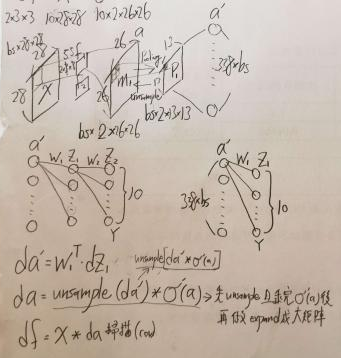

In [ ]:
class CNN:
    def __init__(self):
        np.random.seed(1)
        self.filter = np.random.randn(5, 5) * 0.01  # (5, 5)  # 用randn與random對結果幾乎沒有差別
        np.random.seed(2)
        self.w1 = np.random.randn(10, 12*12) * 0.01  # (10, 144)
        np.random.seed(3)
        self.b1 = np.random.randn(1, 10)* 0.01  # (10, 1)

    def predict(self, input):
        feature_map = np.zeros((24, 24))  # (28*28 -> 24*24)
        matrix = np.zeros((5, 5))
        for i in range(len(feature_map)) :
            for j in range(len(feature_map)):
                matrix = input[i:i+len(matrix), j:j+len(matrix)]
                feature_map[i,j] = np.sum(self.filter * matrix)

        # Max-pooling (24*24 -> 12*12)
        frame = np.zeros((2, 2))
        feature_map_pooled = np.zeros((12, 12))

        for row in range(len(feature_map_pooled)) :
            for column in range(len(feature_map_pooled)):
                frame = feature_map[2*row:2*row+len(frame), 2*column:2*column+len(frame)]
                feature_map_pooled[row, column]= np.max(frame)

        feature_map_pooled_flatten = feature_map_pooled.reshape(1, 12*12)
        output = softmax(np.dot(feature_map_pooled_flatten, self.w1.T) + self.b1)
        return output

    def train(self, input, ground_truth, epochs, learning_rate):
        accuracy = []

        for epoch in range(epochs):
            error = 0
            correct_count = 0

            for i in range(len(input)):
                picture = input[i]
                label = ground_truth[i]  # (10,)

                # forward
                feature_map = np.zeros((24, 24))  # (28*28 -> 24*24)
                matrix_1 = np.zeros((5, 5))
                for i in range(len(feature_map)) :
                    for j in range(len(feature_map)):
                        matrix_1 = picture[i:i+len(matrix_1), j:j+len(matrix_1)]
                        feature_map[i,j] = np.sum(self.filter * matrix_1)

                # Max-pooling (24*24 -> 12*12)
                frame = np.zeros((2, 2))
                feature_map_pooled = np.zeros((12, 12))
                feature_map_max_position = np.zeros((24, 24))

                for row in range(len(feature_map_pooled)) :
                    for column in range(len(feature_map_pooled)):
                        frame = feature_map[2*row:2*row+len(frame), 2*column:2*column+len(frame)]
                        feature_map_pooled[row, column]= np.max(frame)

                        # record the index of max value
                        max_index = np.argmax(frame)
                        feature_map_max_position[2*row+(max_index//2), 2*column+(max_index%2)] = 1

                feature_map_pooled_relu = relu(feature_map_pooled)

                # flatten
                feature_map_pooled_flatten = feature_map_pooled_relu.reshape(1, 12*12)  # (1, 144)
                output = softmax(np.dot(feature_map_pooled_flatten, self.w1.T) + self.b1)  # (1, 10)  # 加不加softmax幾乎沒差別

                # error = cross_entropy_loss(output, label)

                # backward
                dz1 = output - label  # (1, 10)  乘上relu_derive準確度會提高一些
                error = cross_entropy_loss(output, label)
                dw1 = np.dot(feature_map_pooled_flatten.T, dz1).T  # (144, 10)
                # dw1 = np.outer(dz1, feature_map_pooled_flatten)  # 與dot無差別
                db1 = dz1  # (1, 10)

                da_pulum = np.dot(dz1, self.w1)  # (1, 144)
                da_pulum_unsample = da_pulum.reshape(12, 12)  # (12, 12)
                da = da_pulum_unsample * relu_derive(feature_map_pooled)  # (12, 12)

                # expand da:(12, 12)-->(24, 24)
                da_original = np.zeros((24, 24))
                for column in range(12):
                    for row in range(12):
                        da_original[row*2, column*2] = da[row, column]
                        da_original[row*2+1, column*2] = da[row, column]
                        da_original[row*2, column*2+1] = da[row, column]
                        da_original[row*2+1, column*2+1] = da[row, column]

                da_original = da_original * feature_map_max_position  # (24, 24)

                # compute df (x和da_original進行卷積)
                df = np.zeros((5, 5))
                matrix_2 = np.zeros((24, 24))

                for column in range(len(df)):
                    for row in range(len(df)):
                        matrix_2 = picture[row:row+len(matrix_2), column:column+len(matrix_2)]
                        df[row, column] = np.sum(matrix_2 * da_original)

                # update parameter
                self.w1 = self.w1 - learning_rate * dw1
                self.b1 = self.b1 - learning_rate * db1
                self.filter = self.filter - learning_rate * df

                # calculate accuracy on training set
                if(np.argmax(output) == np.argmax(label)):
                    correct_count += 1

            acc = correct_count / len(input) * 100
            accuracy.append(acc)

            # calculate accuracy on test set
            num_correct = 0
            for k in range(len(test_X)):
                prediction = self.predict(test_X[k])
                if np.argmax(prediction) == np.argmax(y_test_one_hot[k]):
                    num_correct += 1

            acc_test = num_correct / len(test_X) * 100

            print("Epoch {}, error = {}, training accuracy = {} %, testing accuracy = {} %".format(epoch+1, round(error, 8), round(acc, 3), round(acc_test, 3)))

        # show the accuracy graph
        plt.plot(range(1, epochs+1), accuracy, color='red')
        plt.xlabel("Epoch")
        plt.ylabel("accuracy (%)")
        plt.show()

Epoch 1, error = 0.00145161, training accuracy = 73.3 %, testing accuracy = 84.133 %
Epoch 2, error = 0.00072609, training accuracy = 88.833 %, testing accuracy = 84.667 %
Epoch 3, error = 0.00048782, training accuracy = 89.967 %, testing accuracy = 84.933 %
Epoch 4, error = 0.00037072, training accuracy = 90.9 %, testing accuracy = 84.967 %
Epoch 5, error = 0.00026617, training accuracy = 91.8 %, testing accuracy = 85.133 %


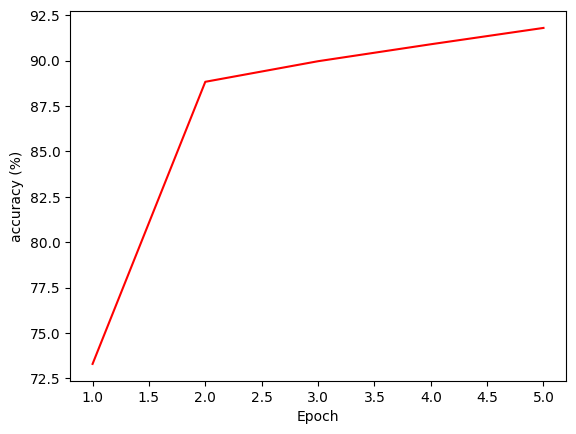

In [ ]:
nn1 = CNN()
nn1.train(train_X, y_train_one_hot, 5, 0.01)

# **CNN case.2**
*CNN Activation function:* `ReLU`<p>
***CNN number of filter:*** `2`<p>
*CNN size of filter:* `5x5`<p>
*CNN number of layer:* `1`<p>
*CNN bias:* `no`<p>
*CNN Pooling:* `2x2`<p>
*Batch size:* `1`<p>
*Learning Rate algorithm:* `fixed(0.01)`<p>
*Training time:* `6 min 52 sec`<p>
*Epoch `5` : training accuracy = `94.767 %` , testing accuracy =` 90.3 %`*

In [ ]:
class CNN_v2:
    def __init__(self, num_filter):
        self.num_filter = num_filter
        np.random.seed(1)
        self.filter = np.random.randn(num_filter, 5, 5) * 0.01  # (2, 5, 5)  # 用randn與random對結果幾乎沒有差別
        np.random.seed(2)
        self.w1 = np.random.randn(10, num_filter*12*12) * 0.01  # (10, 288)
        np.random.seed(3)
        self.b1 = np.random.randn(1, 10)* 0.01  # (1, 10)

    def predict(self, input):
        feature_map = np.zeros((self.num_filter, 24, 24))  # (28, 28)-->feature_map:(2, 24, 24)
        matrix_1 = np.zeros((5, 5))
        for f in range(self.num_filter):
            for i in range(len(feature_map[0])):
                for j in range(len(feature_map[0])):
                    matrix_1 = input[i:i+len(matrix_1), j:j+len(matrix_1)]
                    feature_map[f, i, j] = np.sum(self.filter[f] * matrix_1)

        # Max-pooling : (2, 24, 24)-->(2, 12, 12)
        frame = np.zeros((2, 2))
        feature_map_pooled = np.zeros((self.num_filter, 12, 12))  # (2, 12, 12)
        feature_map_max_position = np.zeros((self.num_filter, 24, 24))  # (2, 24, 24)

        for f in range(self.num_filter):
            for row in range(len(feature_map_pooled[0])) :
                for column in range(len(feature_map_pooled[0])):
                    frame = feature_map[f, 2*row:2*row+len(frame), 2*column:2*column+len(frame)]
                    feature_map_pooled[f, row, column]= np.max(frame)

        feature_map_pooled_relu = relu(feature_map_pooled)  # (2, 12, 12)

        # flatten
        feature_map_pooled_flatten = feature_map_pooled_relu.reshape(1, self.num_filter*12*12)  # (1, 288)
        output = softmax(np.dot(feature_map_pooled_flatten, self.w1.T) + self.b1)  # (1, 10)  # 加不加softmax幾乎沒差別
        return output

    def train(self, input, ground_truth, epochs, learning_rate):
        accuracy = []

        for epoch in range(epochs):
            error = 0
            correct_count = 0

            for i in range(len(input)):
                picture = input[i]
                label = ground_truth[i]  # (10,)

                # forward
                feature_map = np.zeros((self.num_filter, 24, 24))  # (28, 28)-->feature_map:(2, 24, 24)
                matrix_1 = np.zeros((5, 5))
                for f in range(self.num_filter):
                    for i in range(len(feature_map[0])):
                        for j in range(len(feature_map[0])):
                            matrix_1 = picture[i:i+len(matrix_1), j:j+len(matrix_1)]
                            feature_map[f, i, j] = np.sum(self.filter[f] * matrix_1)

                # Max-pooling : (2, 24, 24)-->(2, 12, 12)
                frame = np.zeros((2, 2))
                feature_map_pooled = np.zeros((self.num_filter, 12, 12))  # (2, 12, 12)
                feature_map_max_position = np.zeros((self.num_filter, 24, 24))  # (2, 24, 24)

                for f in range(self.num_filter):
                    for row in range(len(feature_map_pooled[0])) :
                        for column in range(len(feature_map_pooled[0])):
                            frame = feature_map[f, 2*row:2*row+len(frame), 2*column:2*column+len(frame)]
                            feature_map_pooled[f, row, column]= np.max(frame)

                            # record the index of max value
                            max_index = np.argmax(frame)
                            feature_map_max_position[f, 2*row+(max_index//2), 2*column+(max_index%2)] = 1

                feature_map_pooled_relu = relu(feature_map_pooled)  # (2, 12, 12)

                # flatten
                feature_map_pooled_flatten = feature_map_pooled_relu.reshape(1, self.num_filter*12*12)  # (1, 288)
                output = softmax(np.dot(feature_map_pooled_flatten, self.w1.T) + self.b1)  # (1, 10)  # 加不加softmax幾乎沒差別

                # backward
                dz1 = output - label  # (1, 10)  乘上relu_derive準確度會提高一些
                error = cross_entropy_loss(output, label)
                dw1 = np.dot(feature_map_pooled_flatten.T, dz1).T  # (10, 288)
                # dw1 = np.outer(dz1, feature_map_pooled_flatten)  # 與dot無差別
                db1 = dz1  # (1, 10)

                da_pulum = np.dot(dz1, self.w1)  # (1, 288)
                da_pulum_unsample = da_pulum.reshape(self.num_filter, 12, 12)  # (2, 12, 12)
                da = da_pulum_unsample * relu_derive(feature_map_pooled)  # (2, 12, 12)

                # expand da:(2, 12, 12)-->(2, 24, 24)
                da_original = np.zeros((self.num_filter, 24, 24))
                for f in range(self.num_filter):
                    for column in range(12):
                        for row in range(12):
                            da_original[f, row*2, column*2] = da[f, row, column]
                            da_original[f, row*2+1, column*2] = da[f, row, column]
                            da_original[f, row*2, column*2+1] = da[f, row, column]
                            da_original[f, row*2+1, column*2+1] = da[f, row, column]

                da_original = da_original * feature_map_max_position  # (2, 24, 24)

                # compute df (x和da_original進行卷積)
                df = np.zeros((self.num_filter, 5, 5))  # (2, 5, 5)
                matrix_2 = np.zeros((24, 24))

                for f in range(self.num_filter):
                    for column in range(len(df[0])):
                        for row in range(len(df[0])):
                            matrix_2 = picture[row:row+len(matrix_2), column:column+len(matrix_2)]
                            df[f, row, column] = np.sum(matrix_2 * da_original[f])

                # update parameter
                self.w1 = self.w1 - learning_rate * dw1
                self.b1 = self.b1 - learning_rate * db1
                self.filter = self.filter - learning_rate * df

                # calculate accuracy on training set
                if(np.argmax(output) == np.argmax(label)):
                    correct_count += 1

            acc = correct_count / len(input) * 100
            accuracy.append(acc)

            # calculate accuracy on test set
            num_correct = 0
            for k in range(len(test_X)):
                prediction = self.predict(test_X[k])
                if np.argmax(prediction) == np.argmax(y_test_one_hot[k]):
                    num_correct += 1

            acc_test = num_correct / len(test_X) * 100

            print("Epoch {}, error = {}, training accuracy = {} %, testing accuracy = {} %".format(epoch+1, round(error, 8), round(acc, 3), round(acc_test, 3)))

        # show the accuracy graph
        plt.plot(range(1, epochs+1), accuracy, color='red')
        plt.xlabel("Epoch")
        plt.ylabel("accuracy (%)")
        plt.show()

Epoch 1, error = 0.01034432, training accuracy = 73.7 %, testing accuracy = 85.0 %
Epoch 2, error = 0.00895009, training accuracy = 89.9 %, testing accuracy = 88.5 %
Epoch 3, error = 0.00543522, training accuracy = 92.4 %, testing accuracy = 89.6 %
Epoch 4, error = 0.00327371, training accuracy = 93.733 %, testing accuracy = 90.333 %
Epoch 5, error = 0.00221675, training accuracy = 94.767 %, testing accuracy = 90.3 %


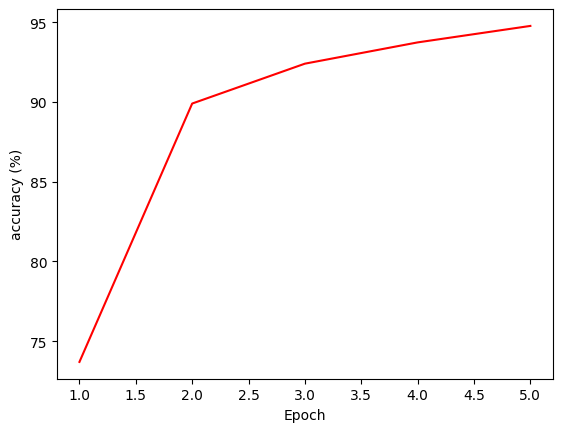

In [ ]:
nn2 = CNN_v2(2)
nn2.train(train_X, y_train_one_hot, 5, 0.01)

# **CNN case.3**
*CNN Activation function:* `ReLU`<p>
*CNN number of filter:* `2`<p>
*CNN size of filter:* `5x5`<p>
*CNN number of layer:* `1`<p>
*CNN bias:* `no`<p>
*CNN Pooling:* `2x2`<p>
***Batch size:*** `10`<p>
*Learning Rate algorithm:* `fixed(0.01)`<p>
*Training time:* `6 min 34 sec`<p>
*Epoch `5` : training accuracy = `90.133 %` , testing accuracy =`85.233 %`*

In [ ]:
class CNN_v3:
    def __init__(self, num_filter):
        self.num_filter = num_filter
        np.random.seed(1)
        self.filter = np.random.randn(num_filter, 5, 5) * 0.01  # (2, 5, 5)  # 用randn與random對結果幾乎沒有差別
        np.random.seed(2)
        self.w1 = np.random.randn(10, num_filter*12*12) * 0.01  # (10, 288)
        np.random.seed(3)
        self.b1 = np.random.randn(1, 10)* 0.01  # (1, 10)

    def predict(self, input):
        feature_map = np.zeros((self.num_filter, 24, 24))  # (28, 28)-->feature_map:(2, 24, 24)
        matrix_1 = np.zeros((5, 5))
        for f in range(self.num_filter):
            for i in range(len(feature_map[0])):
                for j in range(len(feature_map[0])):
                    matrix_1 = input[i:i+len(matrix_1), j:j+len(matrix_1)]
                    feature_map[f, i, j] = np.sum(self.filter[f] * matrix_1)

        # Max-pooling : (2, 24, 24)-->(2, 12, 12)
        frame = np.zeros((2, 2))
        feature_map_pooled = np.zeros((self.num_filter, 12, 12))  # (2, 12, 12)
        feature_map_max_position = np.zeros((self.num_filter, 24, 24))  # (2, 24, 24)

        for f in range(self.num_filter):
            for row in range(len(feature_map_pooled[0])) :
                for column in range(len(feature_map_pooled[0])):
                    frame = feature_map[f, 2*row:2*row+len(frame), 2*column:2*column+len(frame)]
                    feature_map_pooled[f, row, column]= np.max(frame)

        feature_map_pooled_relu = relu(feature_map_pooled)  # (2, 12, 12)

        # flatten
        feature_map_pooled_flatten = feature_map_pooled_relu.reshape(1, self.num_filter*12*12)  # (1, 288)
        output = softmax(np.dot(feature_map_pooled_flatten, self.w1.T) + self.b1)  # (1, 10)  # 加不加softmax幾乎沒差別
        return output

    def train(self, input, ground_truth, epochs, batch_size, learning_rate):
        accuracy = []
        batch_num = len(input) // batch_size  # 3000 / 10 = 300

        for epoch in range(epochs):
            error = 0
            correct_count = 0

            for batch in range(batch_num):
                picture = input[batch_size*batch:batch_size*batch+batch_size]  # (batch_size, 28, 28)
                label = ground_truth[batch_size*batch:batch_size*batch+batch_size]  # (batch_size, 10)

                # forward
                feature_map = np.zeros((batch_size, self.num_filter, 24, 24))  # (batch_size, 28, 28)-->feature_map:(batch_size, 2, 24, 24)
                matrix_1 = np.zeros((5, 5))
                for count in range(batch_size):
                    for f in range(self.num_filter):
                        for i in range(len(feature_map[0, 0])):
                            for j in range(len(feature_map[0, 0])):
                                matrix_1 = picture[count, i:i+len(matrix_1), j:j+len(matrix_1)]
                                feature_map[count, f, i, j] = np.sum(self.filter[f] * matrix_1)

                # Max-pooling : (batch_size, 2, 24, 24)-->(batch_size, 2, 12, 12)
                frame = np.zeros((2, 2))
                feature_map_pooled = np.zeros((batch_size, self.num_filter, 12, 12))  # (batch_size, 2, 12, 12)
                feature_map_max_position = np.zeros((batch_size, self.num_filter, 24, 24))  # (batch_size, 2, 24, 24)

                for count in range(batch_size):
                    for f in range(self.num_filter):
                        for row in range(len(feature_map_pooled[0, 0])):
                            for column in range(len(feature_map_pooled[0, 0])):
                                frame = feature_map[count, f, 2*row:2*row+len(frame), 2*column:2*column+len(frame)]
                                feature_map_pooled[count, f, row, column]= np.max(frame)

                                # record the index of max value
                                max_index = np.argmax(frame)
                                feature_map_max_position[count, f, 2*row+(max_index//2), 2*column+(max_index%2)] = 1

                feature_map_pooled_relu = relu(feature_map_pooled)  # (batch_size, 2, 12, 12)

                # flatten
                feature_map_pooled_flatten = feature_map_pooled_relu.reshape(batch_size, self.num_filter*12*12)  # (batch_size, 288)
                output = softmax(np.dot(feature_map_pooled_flatten, self.w1.T) + self.b1)  # (batch_size, 10)  # 加不加softmax幾乎沒差別

                # backward
                dz1 = output - label  # (batch_size, 10)  乘上relu_derive準確度會提高一些
                error = cross_entropy_loss(output, label)
                dw1 = np.dot(feature_map_pooled_flatten.T, dz1).T  # (10, 288)
                # dw1 = np.outer(dz1, feature_map_pooled_flatten)  # 與dot無差別
                db1 = np.mean(dz1, axis=0, keepdims=True)  # keepdims:(10,)-->(1, 10)

                da_pulum = np.dot(dz1, self.w1)  # (batch_size, 288)
                da_pulum_unsample = da_pulum.reshape(batch_size, self.num_filter, 12, 12)  # (batch_size, 2, 12, 12) (可能會出錯)
                da = da_pulum_unsample * relu_derive(feature_map_pooled)  # (batch_size, 2, 12, 12)

                # expand da:(batch_size, 2, 12, 12)-->(batch_size, 2, 24, 24)
                da_original = np.zeros((batch_size, self.num_filter, 24, 24))
                for count in range(batch_size):
                    for f in range(self.num_filter):
                        for column in range(12):
                            for row in range(12):
                                da_original[count, f, row*2, column*2] = da[count, f, row, column]
                                da_original[count, f, row*2+1, column*2] = da[count, f, row, column]
                                da_original[count, f, row*2, column*2+1] = da[count, f, row, column]
                                da_original[count, f, row*2+1, column*2+1] = da[count, f, row, column]

                da_original = da_original * feature_map_max_position  # (batch_size, 2, 24, 24)

                # compute df (x和da_original進行卷積)
                df = np.zeros((self.num_filter, 5, 5))  # (2, 5, 5)
                matrix_2 = np.zeros((24, 24))

                for count in range(batch_size):
                    for f in range(self.num_filter):
                        for column in range(len(df[0])):
                            for row in range(len(df[0])):
                                matrix_2 = picture[count, row:row+len(matrix_2), column:column+len(matrix_2)]
                                df[f, row, column] = np.sum(matrix_2 * da_original[count, f])

                # update parameter
                self.w1 = self.w1 - learning_rate * dw1
                self.b1 = self.b1 - learning_rate * db1
                self.filter = self.filter - learning_rate * df

                # calculate accuracy on training set
                for count in range(len(output)):
                    if(np.argmax(output[count]) == np.argmax(label[count])):
                        correct_count += 1

            acc = correct_count / len(input) * 100
            accuracy.append(acc)

            # calculate accuracy on test set
            num_correct = 0
            for k in range(len(test_X)):
                prediction = self.predict(test_X[k])
                if np.argmax(prediction) == np.argmax(y_test_one_hot[k]):
                    num_correct += 1

            acc_test = num_correct / len(test_X) * 100

            print("Epoch {}, error = {}, training accuracy = {} %, testing accuracy = {} %".format(epoch+1, round(error, 8), round(acc, 3), round(acc_test, 3)))

        # show the accuracy graph
        plt.plot(range(1, epochs+1), accuracy, color='red')
        plt.xlabel("Epoch")
        plt.ylabel("accuracy (%)")
        plt.show()

Epoch 1, error = 0.06673367, training accuracy = 64.9 %, testing accuracy = 80.567 %
Epoch 2, error = 0.06913027, training accuracy = 86.7 %, testing accuracy = 83.0 %
Epoch 3, error = 0.07165647, training accuracy = 89.033 %, testing accuracy = 84.267 %
Epoch 4, error = 0.06979257, training accuracy = 89.7 %, testing accuracy = 85.033 %
Epoch 5, error = 0.06560281, training accuracy = 90.133 %, testing accuracy = 85.233 %


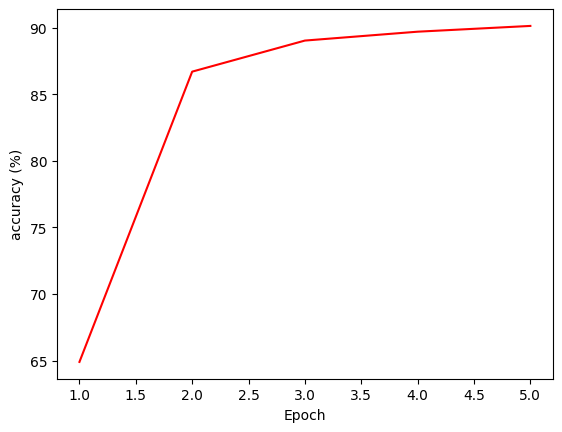

In [ ]:
nn3 = CNN_v3(2)
nn3.train(train_X, y_train_one_hot, 5, 10, 0.01)

# **CNN case.4**
*CNN Activation function:* `ReLU`<p>
*CNN number of filter:* `2`<p>
*CNN size of filter:* `5x5`<p>
*CNN number of layer:* `1`<p>
*CNN bias:* `no`<p>
*CNN Pooling:* `2x2`<p>
***Batch size:*** `5`<p>
*Learning Rate algorithm:* `fixed(0.01)`<p>
*Training time:* `6 min 29 sec`<p>
*Epoch `5` : training accuracy = `93.533 %` , testing accuracy =`88.2 %`*

Epoch 1, error = 0.08357895, training accuracy = 68.067 %, testing accuracy = 83.5 %
Epoch 2, error = 0.05064028, training accuracy = 88.433 %, testing accuracy = 85.567 %
Epoch 3, error = 0.03522204, training accuracy = 90.833 %, testing accuracy = 86.733 %
Epoch 4, error = 0.02721614, training accuracy = 92.533 %, testing accuracy = 87.567 %
Epoch 5, error = 0.02255448, training accuracy = 93.533 %, testing accuracy = 88.2 %


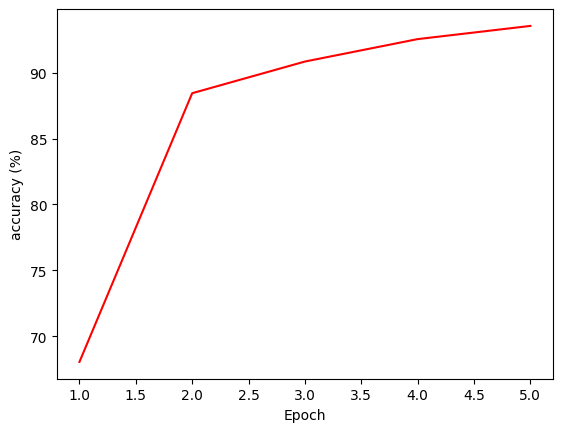

In [ ]:
nn4 = CNN_v3(2)
nn4.train(train_X, y_train_one_hot, 5, 5, 0.01)

# **CNN case.5**
*CNN Activation function:* `ReLU`<p>
***CNN number of filter:*** `3`<p>
*CNN size of filter:* `5x5`<p>
*CNN number of layer:* `1`<p>
*CNN bias:* `no`<p>
*CNN Pooling:* `2x2`<p>
*Batch size:* `5`<p>
*Learning Rate algorithm:* `fixed(0.01)`<p>
*Training time:* `9 min 37 sec`<p>
*Epoch `5` : training accuracy = `93.533 %` , testing accuracy =`88.533 %`*

Epoch 1, error = 0.07522863, training accuracy = 72.8 %, testing accuracy = 83.467 %
Epoch 2, error = 0.04915539, training accuracy = 88.3 %, testing accuracy = 85.1 %
Epoch 3, error = 0.03566339, training accuracy = 90.6 %, testing accuracy = 86.467 %
Epoch 4, error = 0.03109777, training accuracy = 92.033 %, testing accuracy = 87.233 %
Epoch 5, error = 0.02671753, training accuracy = 93.533 %, testing accuracy = 88.533 %


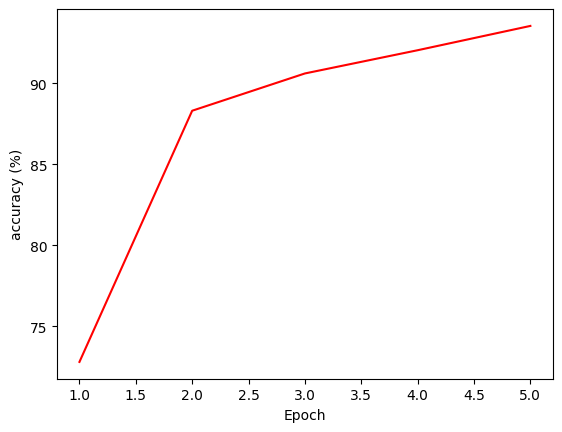

In [ ]:
nn5 = CNN_v3(3)
nn5.train(train_X, y_train_one_hot, 5, 5, 0.01)

# **CNN case.6**
*CNN Activation function:* `ReLU`<p>
*CNN number of filter:* `2`<p>
***CNN size of filter:*** `3x3`<p>
*CNN number of layer:* `1`<p>
*CNN bias:* `no`<p>
*CNN Pooling:* `2x2`<p>
*Batch size:* `5`<p>
*Learning Rate algorithm:* `fixed(0.01)`<p>
*Training time:* `7 min 13 sec`<p>
*Epoch `5` : training accuracy = `91.1 %` , testing accuracy =`86.1 %`*

In [ ]:
class CNN_v4:
    def __init__(self, num_filter, filter_size=5):
        self.num_filter = num_filter
        self.filter_size = filter_size
        self.feature_map_size = 28 - filter_size + 1  # 24
        self.feature_map_pooled_size = self.feature_map_size // 2  # 12
        np.random.seed(1)
        self.filter = np.random.randn(num_filter, filter_size, filter_size) * 0.01  # (2, 5, 5)  # 用randn與random對結果幾乎沒有差別
        np.random.seed(2)
        self.w1 = np.random.randn(10, num_filter*self.feature_map_pooled_size**2) * 0.01  # (10, 288)
        np.random.seed(3)
        self.b1 = np.random.randn(1, 10)* 0.01  # (1, 10)

    def predict(self, input):
        feature_map = np.zeros((self.num_filter, self.feature_map_size, self.feature_map_size))  # (28, 28)-->feature_map:(2, 24, 24)
        matrix_1 = np.zeros((self.filter_size, self.filter_size))
        for f in range(self.num_filter):
            for i in range(len(feature_map[0])):
                for j in range(len(feature_map[0])):
                    matrix_1 = input[i:i+len(matrix_1), j:j+len(matrix_1)]
                    feature_map[f, i, j] = np.sum(self.filter[f] * matrix_1)

        # Max-pooling : (2, 24, 24)-->(2, 12, 12)
        frame = np.zeros((2, 2))
        feature_map_pooled = np.zeros((self.num_filter, self.feature_map_pooled_size, self.feature_map_pooled_size))  # (2, 12, 12)
        feature_map_max_position = np.zeros((self.num_filter, self.feature_map_size, self.feature_map_size))  # (2, 24, 24)

        for f in range(self.num_filter):
            for row in range(len(feature_map_pooled[0])) :
                for column in range(len(feature_map_pooled[0])):
                    frame = feature_map[f, 2*row:2*row+len(frame), 2*column:2*column+len(frame)]
                    feature_map_pooled[f, row, column]= np.max(frame)

        feature_map_pooled_relu = relu(feature_map_pooled)  # (2, 12, 12)

        # flatten
        feature_map_pooled_flatten = feature_map_pooled_relu.reshape(1, self.num_filter*self.feature_map_pooled_size**2)  # (1, 288)
        output = softmax(np.dot(feature_map_pooled_flatten, self.w1.T) + self.b1)  # (1, 10)  # 加不加softmax幾乎沒差別
        return output

    def train(self, input, ground_truth, epochs, batch_size, learning_rate):
        accuracy = []
        batch_num = len(input) // batch_size  # 3000 / 10 = 300

        for epoch in range(epochs):
            error = 0
            correct_count = 0

            for batch in range(batch_num):
                picture = input[batch_size*batch:batch_size*batch+batch_size]  # (batch_size, 28, 28)
                label = ground_truth[batch_size*batch:batch_size*batch+batch_size]  # (batch_size, 10)

                # forward
                feature_map = np.zeros((batch_size, self.num_filter, self.feature_map_size, self.feature_map_size))  # (batch_size, 28, 28)-->feature_map:(batch_size, 2, 24, 24)
                matrix_1 = np.zeros((self.filter_size, self.filter_size))
                for count in range(batch_size):
                    for f in range(self.num_filter):
                        for i in range(len(feature_map[0, 0])):
                            for j in range(len(feature_map[0, 0])):
                                matrix_1 = picture[count, i:i+len(matrix_1), j:j+len(matrix_1)]
                                feature_map[count, f, i, j] = np.sum(self.filter[f] * matrix_1)

                # Max-pooling : (batch_size, 2, 24, 24)-->(batch_size, 2, 12, 12)
                frame = np.zeros((2, 2))
                feature_map_pooled = np.zeros((batch_size, self.num_filter, self.feature_map_pooled_size, self.feature_map_pooled_size))  # (batch_size, 2, 12, 12)
                feature_map_max_position = np.zeros((batch_size, self.num_filter, self.feature_map_size, self.feature_map_size))  # (batch_size, 2, 24, 24)

                for count in range(batch_size):
                    for f in range(self.num_filter):
                        for row in range(len(feature_map_pooled[0, 0])):
                            for column in range(len(feature_map_pooled[0, 0])):
                                frame = feature_map[count, f, 2*row:2*row+len(frame), 2*column:2*column+len(frame)]
                                feature_map_pooled[count, f, row, column]= np.max(frame)

                                # record the index of max value
                                max_index = np.argmax(frame)
                                feature_map_max_position[count, f, 2*row+(max_index//2), 2*column+(max_index%2)] = 1

                feature_map_pooled_relu = relu(feature_map_pooled)  # (batch_size, 2, 12, 12)

                # flatten
                feature_map_pooled_flatten = feature_map_pooled_relu.reshape(batch_size, self.num_filter*self.feature_map_pooled_size**2)  # (batch_size, 288)
                output = softmax(np.dot(feature_map_pooled_flatten, self.w1.T) + self.b1)  # (batch_size, 10)  # 加不加softmax幾乎沒差別

                # backward
                dz1 = output - label  # (batch_size, 10)  乘上relu_derive準確度會提高一些
                error = cross_entropy_loss(output, label)
                dw1 = np.dot(feature_map_pooled_flatten.T, dz1).T  # (10, 288)
                # dw1 = np.outer(dz1, feature_map_pooled_flatten)  # 與dot無差別
                db1 = np.mean(dz1, axis=0, keepdims=True)  # keepdims:(10,)-->(1, 10)

                da_pulum = np.dot(dz1, self.w1)  # (batch_size, 288)
                da_pulum_unsample = da_pulum.reshape(batch_size, self.num_filter, self.feature_map_pooled_size, self.feature_map_pooled_size)  # (batch_size, 2, 12, 12) (可能會出錯)
                da = da_pulum_unsample * relu_derive(feature_map_pooled)  # (batch_size, 2, 12, 12)

                # expand da:(batch_size, 2, 12, 12)-->(batch_size, 2, 24, 24)
                da_original = np.zeros((batch_size, self.num_filter, self.feature_map_size, self.feature_map_size))
                for count in range(batch_size):
                    for f in range(self.num_filter):
                        for column in range(self.feature_map_pooled_size):
                            for row in range(self.feature_map_pooled_size):
                                da_original[count, f, row*2, column*2] = da[count, f, row, column]
                                da_original[count, f, row*2+1, column*2] = da[count, f, row, column]
                                da_original[count, f, row*2, column*2+1] = da[count, f, row, column]
                                da_original[count, f, row*2+1, column*2+1] = da[count, f, row, column]

                da_original = da_original * feature_map_max_position  # (batch_size, 2, 24, 24)

                # compute df (x和da_original進行卷積)
                df = np.zeros((self.num_filter, self.filter_size, self.filter_size))  # (2, 5, 5)
                matrix_2 = np.zeros((self.feature_map_size, self.feature_map_size))

                for count in range(batch_size):
                    for f in range(self.num_filter):
                        for column in range(len(df[0])):
                            for row in range(len(df[0])):
                                matrix_2 = picture[count, row:row+len(matrix_2), column:column+len(matrix_2)]
                                df[f, row, column] = np.sum(matrix_2 * da_original[count, f])

                # update parameter
                self.w1 = self.w1 - learning_rate * dw1
                self.b1 = self.b1 - learning_rate * db1
                self.filter = self.filter - learning_rate * df

                # calculate accuracy on training set
                for count in range(len(output)):
                    if(np.argmax(output[count]) == np.argmax(label[count])):
                        correct_count += 1

            acc = correct_count / len(input) * 100
            accuracy.append(acc)

            # calculate accuracy on test set
            num_correct = 0
            for k in range(len(test_X)):
                prediction = self.predict(test_X[k])
                if np.argmax(prediction) == np.argmax(y_test_one_hot[k]):
                    num_correct += 1

            acc_test = num_correct / len(test_X) * 100

            print("Epoch {}, error = {}, training accuracy = {} %, testing accuracy = {} %".format(epoch+1, round(error, 8), round(acc, 3), round(acc_test, 3)))

        # show the accuracy graph
        plt.plot(range(1, epochs+1), accuracy, color='red')
        plt.xlabel("Epoch")
        plt.ylabel("accuracy (%)")
        plt.show()

Epoch 1, error = 0.08856856, training accuracy = 58.8 %, testing accuracy = 83.5 %
Epoch 2, error = 0.06470165, training accuracy = 87.433 %, testing accuracy = 84.7 %
Epoch 3, error = 0.0519781, training accuracy = 89.5 %, testing accuracy = 85.2 %
Epoch 4, error = 0.04310724, training accuracy = 90.667 %, testing accuracy = 85.667 %
Epoch 5, error = 0.03717645, training accuracy = 91.1 %, testing accuracy = 86.1 %


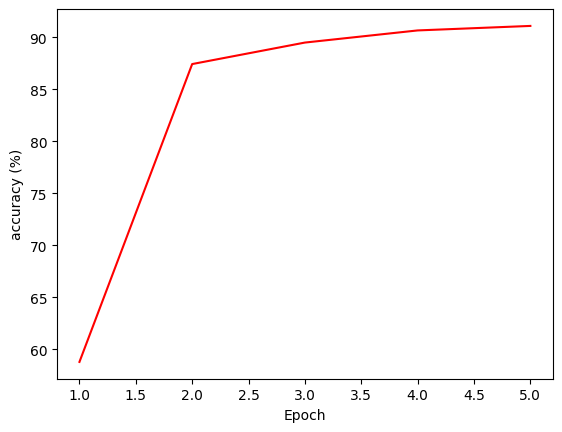

In [ ]:
nn6 = CNN_v4(2, 3)
nn6.train(train_X, y_train_one_hot, 5, 5, 0.01)

# **CNN case.7**
*CNN Activation function:* `ReLU`<p>
***CNN number of filter:*** `3`<p>
*CNN size of filter:* `3x3`<p>
*CNN number of layer:* `1`<p>
*CNN bias:* `no`<p>
*CNN Pooling:* `2x2`<p>
*Batch size:* `5`<p>
*Learning Rate algorithm:* `fixed(0.01)`<p>
*Training time:* `10 min 42 sec`<p>
*Epoch `5` : training accuracy = `91.3 %` , testing accuracy =`86.2 %`*

Epoch 1, error = 0.08752982, training accuracy = 62.367 %, testing accuracy = 83.6 %
Epoch 2, error = 0.06449342, training accuracy = 87.633 %, testing accuracy = 85.067 %
Epoch 3, error = 0.05249165, training accuracy = 89.767 %, testing accuracy = 85.467 %
Epoch 4, error = 0.04471277, training accuracy = 90.533 %, testing accuracy = 85.833 %
Epoch 5, error = 0.03946686, training accuracy = 91.3 %, testing accuracy = 86.2 %


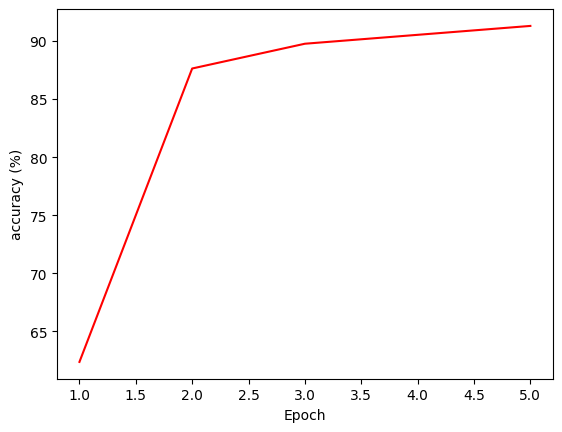

In [ ]:
nn7 = CNN_v4(3, 3)
nn7.train(train_X, y_train_one_hot, 5, 5, 0.01)

# **CNN case.8**
*CNN Activation function:* `ReLU`<p>
*CNN number of filter:* `2`<p>
***CNN size of filter:*** `5x5`<p>
*CNN number of layer:* `1`<p>
*CNN bias:* `no`<p>
***CNN Pooling:*** `no`<p>
*Batch size:* `5`<p>
*Learning Rate algorithm:* `fixed(0.01)`<p>
*Training time:* `6 min 48 sec`<p>
*Epoch `5` : training accuracy = `90.233 %` , testing accuracy =`85.833 %`*<p>
與case.4相比，去掉pooling後，訓練一開始準確率提升較快，但最後(5 epochs)訓練出來的準確率卻較低，原因有待確認。(?)

In [ ]:
class CNN_v5:
    def __init__(self, num_filter, filter_size=5, pooling=True):  # 以num_filter:2, filter_size=5為例
        self.num_filter = num_filter
        self.filter_size = filter_size
        self.pooling = pooling
        self.feature_map_size = 28 - filter_size + 1  # 24
        self.feature_map_pooled_size = self.feature_map_size // 2  # 12
        np.random.seed(1)
        self.filter = np.random.randn(num_filter, filter_size, filter_size) * 0.01  # (2, 5, 5)  # 用randn與random對結果幾乎沒有差別
        np.random.seed(2)
        if pooling:
            self.w1 = np.random.randn(10, num_filter*self.feature_map_pooled_size**2) * 0.01  # (10, 288)
        else:
            self.w1 = np.random.randn(10, num_filter*self.feature_map_size**2) * 0.01  # (10, 1152)
        np.random.seed(3)
        self.b1 = np.random.randn(1, 10)* 0.01  # (1, 10)

    def predict(self, input):
        feature_map = np.zeros((self.num_filter, self.feature_map_size, self.feature_map_size))  # (28, 28)-->feature_map:(2, 24, 24)
        matrix_1 = np.zeros((self.filter_size, self.filter_size))
        for f in range(self.num_filter):
            for i in range(len(feature_map[0])):
                for j in range(len(feature_map[0])):
                    matrix_1 = input[i:i+len(matrix_1), j:j+len(matrix_1)]
                    feature_map[f, i, j] = np.sum(self.filter[f] * matrix_1)

        if self.pooling:
            # Max-pooling : (2, 24, 24)-->(2, 12, 12)
            frame = np.zeros((2, 2))
            feature_map_pooled = np.zeros((self.num_filter, self.feature_map_pooled_size, self.feature_map_pooled_size))  # (2, 12, 12)
            feature_map_max_position = np.zeros((self.num_filter, self.feature_map_size, self.feature_map_size))  # (2, 24, 24)

            for f in range(self.num_filter):
                for row in range(len(feature_map_pooled[0])) :
                    for column in range(len(feature_map_pooled[0])):
                        frame = feature_map[f, 2*row:2*row+len(frame), 2*column:2*column+len(frame)]
                        feature_map_pooled[f, row, column]= np.max(frame)

            feature_map_pooled_relu = relu(feature_map_pooled)  # (2, 12, 12)

            # flatten
            feature_map_pooled_flatten = feature_map_pooled_relu.reshape(1, self.num_filter*self.feature_map_pooled_size**2)  # (1, 288)
            output = softmax(np.dot(feature_map_pooled_flatten, self.w1.T) + self.b1)  # (1, 10)  # 加不加softmax幾乎沒差別

        else:
            # flatten
            feature_map_flatten = feature_map.reshape(1, self.num_filter*self.feature_map_size**2)  # (1, 1152)
            feature_map_flatten_relu = relu(feature_map_flatten)  # (1, 1152)
            output = softmax(np.dot(feature_map_flatten_relu, self.w1.T) + self.b1)  # (1, 10)  # 加不加softmax幾乎沒差別

        return output

    def train(self, input, ground_truth, epochs, batch_size, learning_rate):
        accuracy = []
        batch_num = len(input) // batch_size  # 3000 / 10 = 300

        for epoch in range(epochs):
            error = 0
            correct_count = 0

            for batch in range(batch_num):
                picture = input[batch_size*batch:batch_size*batch+batch_size]  # (batch_size, 28, 28)
                label = ground_truth[batch_size*batch:batch_size*batch+batch_size]  # (batch_size, 10)

                # forward
                feature_map = np.zeros((batch_size, self.num_filter, self.feature_map_size, self.feature_map_size))  # (batch_size, 28, 28)-->feature_map:(batch_size, 2, 24, 24)
                matrix_1 = np.zeros((self.filter_size, self.filter_size))
                for count in range(batch_size):
                    for f in range(self.num_filter):
                        for i in range(len(feature_map[0, 0])):
                            for j in range(len(feature_map[0, 0])):
                                matrix_1 = picture[count, i:i+len(matrix_1), j:j+len(matrix_1)]
                                feature_map[count, f, i, j] = np.sum(self.filter[f] * matrix_1)

                if self.pooling:
                    # Max-pooling : (batch_size, 2, 24, 24)-->(batch_size, 2, 12, 12)
                    frame = np.zeros((2, 2))
                    feature_map_pooled = np.zeros((batch_size, self.num_filter, self.feature_map_pooled_size, self.feature_map_pooled_size))  # (batch_size, 2, 12, 12)
                    feature_map_max_position = np.zeros((batch_size, self.num_filter, self.feature_map_size, self.feature_map_size))  # (batch_size, 2, 24, 24)

                    for count in range(batch_size):
                        for f in range(self.num_filter):
                            for row in range(len(feature_map_pooled[0, 0])):
                                for column in range(len(feature_map_pooled[0, 0])):
                                    frame = feature_map[count, f, 2*row:2*row+len(frame), 2*column:2*column+len(frame)]
                                    feature_map_pooled[count, f, row, column]= np.max(frame)

                                    # record the index of max value
                                    max_index = np.argmax(frame)
                                    feature_map_max_position[count, f, 2*row+(max_index//2), 2*column+(max_index%2)] = 1

                    feature_map_pooled_relu = relu(feature_map_pooled)  # (batch_size, 2, 12, 12)

                    # flatten
                    feature_map_pooled_flatten = feature_map_pooled_relu.reshape(batch_size, self.num_filter*self.feature_map_pooled_size**2)  # (batch_size, 288)
                    output = softmax(np.dot(feature_map_pooled_flatten, self.w1.T) + self.b1)  # (batch_size, 10)  # 加不加softmax幾乎沒差別

                    # backward
                    dz1 = output - label  # (batch_size, 10)  乘上relu_derive準確度會提高一些
                    error = cross_entropy_loss(output, label)
                    dw1 = np.dot(feature_map_pooled_flatten.T, dz1).T  # (10, 288)
                    # dw1 = np.outer(dz1, feature_map_pooled_flatten)  # 與dot無差別
                    db1 = np.mean(dz1, axis=0, keepdims=True)  # keepdims:(10,)-->(1, 10)

                    da_pulum = np.dot(dz1, self.w1)  # (batch_size, 288)
                    da_pulum_unsample = da_pulum.reshape(batch_size, self.num_filter, self.feature_map_pooled_size, self.feature_map_pooled_size)  # (batch_size, 2, 12, 12) (可能會出錯)
                    da = da_pulum_unsample * relu_derive(feature_map_pooled)  # (batch_size, 2, 12, 12)

                    # expand da:(batch_size, 2, 12, 12)-->(batch_size, 2, 24, 24)
                    da_original = np.zeros((batch_size, self.num_filter, self.feature_map_size, self.feature_map_size))
                    for count in range(batch_size):
                        for f in range(self.num_filter):
                            for column in range(self.feature_map_pooled_size):
                                for row in range(self.feature_map_pooled_size):
                                    da_original[count, f, row*2, column*2] = da[count, f, row, column]
                                    da_original[count, f, row*2+1, column*2] = da[count, f, row, column]
                                    da_original[count, f, row*2, column*2+1] = da[count, f, row, column]
                                    da_original[count, f, row*2+1, column*2+1] = da[count, f, row, column]

                    da_original = da_original * feature_map_max_position  # (batch_size, 2, 24, 24)

                    # compute df (x和da_original進行卷積)
                    df = np.zeros((self.num_filter, self.filter_size, self.filter_size))  # (2, 5, 5)
                    matrix_2 = np.zeros((self.feature_map_size, self.feature_map_size))

                    for count in range(batch_size):
                        for f in range(self.num_filter):
                            for column in range(len(df[0])):
                                for row in range(len(df[0])):
                                    matrix_2 = picture[count, row:row+len(matrix_2), column:column+len(matrix_2)]
                                    df[f, row, column] = np.sum(matrix_2 * da_original[count, f])

                else:
                    # flatten  因為要紀錄feature_map_flatten，所以先拉平再relu
                    feature_map_flatten = feature_map.reshape(batch_size, self.num_filter*self.feature_map_size**2)  # (batch_size, 1152)
                    feature_map_flatten_relu = relu(feature_map_flatten)  # (batch_size, 1152)
                    output = softmax(np.dot(feature_map_flatten_relu, self.w1.T) + self.b1)  # (batch_size, 10)  # 加不加softmax幾乎沒差別

                    # backward
                    dz1 = output - label  # (batch_size, 10)  乘上relu_derive準確度會提高一些
                    error = cross_entropy_loss(output, label)
                    dw1 = np.dot(feature_map_flatten.T, dz1).T  # (10, 1152)
                    db1 = np.mean(dz1, axis=0, keepdims=True)  # keepdims:(10,)-->(1, 10)

                    da = np.dot(dz1, self.w1) * relu_derive(feature_map_flatten) # (batch_size, 1152)
                    da = da.reshape(batch_size, self.num_filter, self.feature_map_size, self.feature_map_size)  # (batch_size, 2, 24, 24)

                    # compute df (x和da進行卷積)
                    df = np.zeros((self.num_filter, self.filter_size, self.filter_size))  # (2, 5, 5)
                    matrix_2 = np.zeros((self.feature_map_size, self.feature_map_size))

                    for count in range(batch_size):
                        for f in range(self.num_filter):
                            for column in range(len(df[0])):
                                for row in range(len(df[0])):
                                    matrix_2 = picture[count, row:row+len(matrix_2), column:column+len(matrix_2)]
                                    df[f, row, column] = np.sum(matrix_2 * da[count, f])

                # update parameter
                self.w1 = self.w1 - learning_rate * dw1
                self.b1 = self.b1 - learning_rate * db1
                self.filter = self.filter - learning_rate * df

                # calculate accuracy on training set
                for count in range(len(output)):
                    if(np.argmax(output[count]) == np.argmax(label[count])):
                        correct_count += 1

            acc = correct_count / len(input) * 100
            accuracy.append(acc)

            # calculate accuracy on test set
            num_correct = 0
            for k in range(len(test_X)):
                prediction = self.predict(test_X[k])
                if np.argmax(prediction) == np.argmax(y_test_one_hot[k]):
                    num_correct += 1

            acc_test = num_correct / len(test_X) * 100

            print("Epoch {}, error = {}, training accuracy = {} %, testing accuracy = {} %".format(epoch+1, round(error, 8), round(acc, 3), round(acc_test, 3)))

        # show the accuracy graph
        plt.plot(range(1, epochs+1), accuracy, color='red')
        plt.xlabel("Epoch")
        plt.ylabel("accuracy (%)")
        plt.show()

Epoch 1, error = 0.0851491, training accuracy = 76.6 %, testing accuracy = 84.133 %
Epoch 2, error = 0.07883104, training accuracy = 88.633 %, testing accuracy = 84.5 %
Epoch 3, error = 0.0779379, training accuracy = 89.5 %, testing accuracy = 85.5 %
Epoch 4, error = 0.07805013, training accuracy = 89.5 %, testing accuracy = 85.8 %
Epoch 5, error = 0.07691027, training accuracy = 90.233 %, testing accuracy = 85.833 %


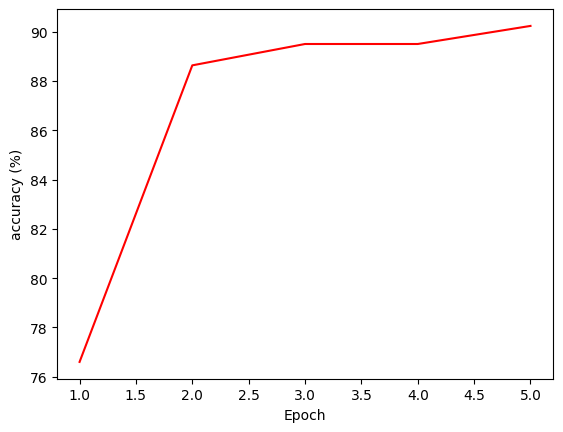

In [ ]:
nn8 = CNN_v5(2, 5, False)
nn8.train(train_X, y_train_one_hot, 5, 5, 0.01)

# **CNN case.9**
*CNN Activation function:* `ReLU`<p>
*CNN number of filter:* `2`<p>
***CNN size of filter:*** `3x3`<p>
*CNN number of layer:* `1`<p>
*CNN bias:* `no`<p>
***CNN Pooling:*** `no`<p>
*Batch size:* `5`<p>
*Learning Rate algorithm:* `fixed(0.01)`<p>
*Training time:* `7 min 43 sec`<p>
*Epoch `5` : training accuracy = `92.0 %` , testing accuracy =`86.667 %`*<p>
與case.6相比，去掉pooling後，準確率有提升一點。

Epoch 1, error = 0.10167311, training accuracy = 63.1 %, testing accuracy = 84.333 %
Epoch 2, error = 0.07171994, training accuracy = 88.0 %, testing accuracy = 85.267 %
Epoch 3, error = 0.05802827, training accuracy = 90.2 %, testing accuracy = 85.9 %
Epoch 4, error = 0.05027149, training accuracy = 91.267 %, testing accuracy = 86.267 %
Epoch 5, error = 0.04705405, training accuracy = 92.0 %, testing accuracy = 86.667 %


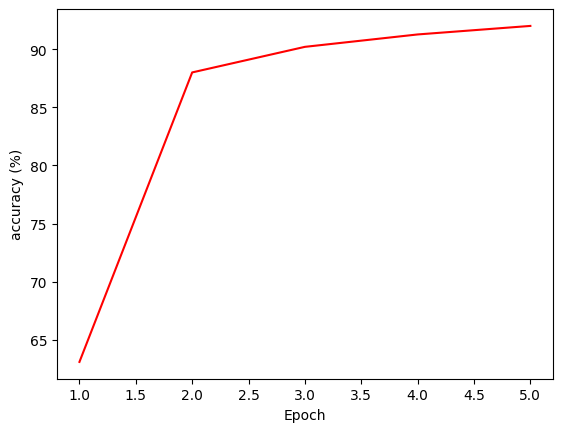

In [ ]:
nn9 = CNN_v5(2, 3, False)
nn9.train(train_X, y_train_one_hot, 5, 5, 0.01)

# **CNN case.10**
*CNN Activation function:* `ReLU`<p>
*CNN number of filter:* `2`<p>
***CNN size of filter:*** `7x7`<p>
*CNN number of layer:* `1`<p>
*CNN bias:* `no`<p>
*CNN Pooling:* `2x2`<p>
*Batch size:* `5`<p>
*Learning Rate algorithm:* `fixed(0.01)`<p>
*Training time:* `5 min 22 sec`<p>
*Epoch `5` : training accuracy = `92.667 %` , testing accuracy =`90.167 %`*<p>
與case.4相比，增加filter size為7時，雖然training accuracy降約1%，但testing accuracy提升約2%。

Epoch 1, error = 0.07450563, training accuracy = 70.933 %, testing accuracy = 84.467 %
Epoch 2, error = 0.06399414, training accuracy = 88.1 %, testing accuracy = 86.133 %
Epoch 3, error = 0.0589194, training accuracy = 90.467 %, testing accuracy = 87.633 %
Epoch 4, error = 0.04974101, training accuracy = 91.967 %, testing accuracy = 89.233 %
Epoch 5, error = 0.04411408, training accuracy = 92.667 %, testing accuracy = 90.167 %


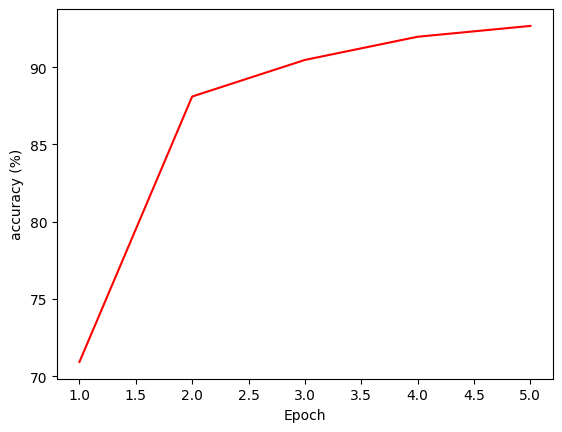

In [ ]:
nn10 = CNN_v5(2, 7)
nn10.train(train_X, y_train_one_hot, 5, 5, 0.01)

# **CNN case.11**
*CNN Activation function:* `ReLU`<p>
*CNN number of filter:* `2`<p>
***CNN size of filter:*** `9x9`<p>
*CNN number of layer:* `1`<p>
*CNN bias:* `no`<p>
*CNN Pooling:* `2x2`<p>
*Batch size:* `5`<p>
*Learning Rate algorithm:* `fixed(0.01)`<p>
*Training time:* `4 min 39 sec`<p>
*Epoch `5` : training accuracy = `91.867 %` , testing accuracy =`87.867 %`*<p>


Epoch 1, error = 0.1108135, training accuracy = 70.033 %, testing accuracy = 84.633 %
Epoch 2, error = 0.08615388, training accuracy = 87.033 %, testing accuracy = 86.1 %
Epoch 3, error = 0.06679701, training accuracy = 89.5 %, testing accuracy = 87.3 %
Epoch 4, error = 0.04916098, training accuracy = 90.967 %, testing accuracy = 87.567 %
Epoch 5, error = 0.03264393, training accuracy = 91.867 %, testing accuracy = 87.867 %


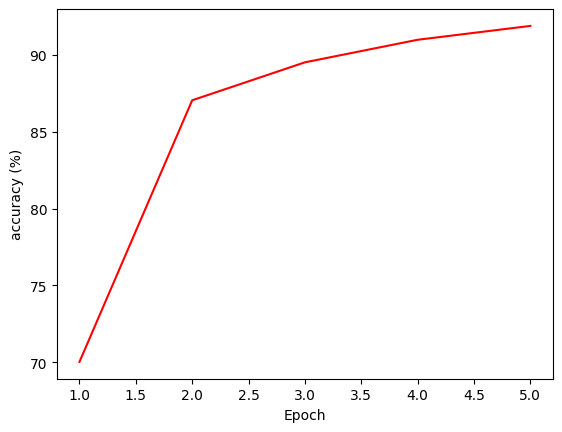

In [ ]:
nn11 = CNN_v5(2, 9)
nn11.train(train_X, y_train_one_hot, 5, 5, 0.01)

# **CNN case.12**
*CNN Activation function:* `ReLU`<p>
*CNN number of filter:* `2`<p>
***CNN size of filter:*** `11x11`<p>
*CNN number of layer:* `1`<p>
*CNN bias:* `no`<p>
*CNN Pooling:* `2x2`<p>
*Batch size:* `5`<p>
*Learning Rate algorithm:* `fixed(0.01)`<p>
*Training time:* `4 min 3 sec`<p>
*Epoch `5` : training accuracy = `93.333 %` , testing accuracy =`90.333 %`*<p>


Epoch 1, error = 0.0933084, training accuracy = 72.067 %, testing accuracy = 85.5 %
Epoch 2, error = 0.03437042, training accuracy = 88.633 %, testing accuracy = 88.267 %
Epoch 3, error = 0.0264105, training accuracy = 91.067 %, testing accuracy = 89.233 %
Epoch 4, error = 0.017288, training accuracy = 92.467 %, testing accuracy = 90.133 %
Epoch 5, error = 0.01146568, training accuracy = 93.333 %, testing accuracy = 90.333 %


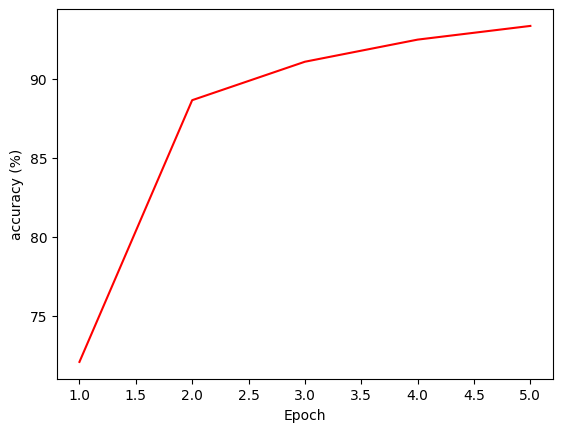

In [ ]:
nn12 = CNN_v5(2, 11)
nn12.train(train_X, y_train_one_hot, 5, 5, 0.01)

# **CNN case.13**
*CNN Activation function:* `ReLU`<p>
*CNN number of filter:* `2`<p>
***CNN size of filter:*** `7x7`<p>
*CNN number of layer:* `1`<p>
*CNN bias:* `no`<p>
***CNN Pooling:*** `no`<p>
*Batch size:* `5`<p>
*Learning Rate algorithm:* `fixed(0.01)`<p>
*Training time:* `6 min 6 sec`<p>
*Epoch `5` : training accuracy = `90.2 %` , testing accuracy =`85.3 %`*<p>


Epoch 1, error = 0.090005, training accuracy = 76.6 %, testing accuracy = 84.833 %
Epoch 2, error = 0.12147789, training accuracy = 87.167 %, testing accuracy = 84.7 %
Epoch 3, error = 0.14344143, training accuracy = 88.4 %, testing accuracy = 84.767 %
Epoch 4, error = 0.14297124, training accuracy = 89.5 %, testing accuracy = 84.633 %
Epoch 5, error = 0.11431092, training accuracy = 90.2 %, testing accuracy = 85.3 %


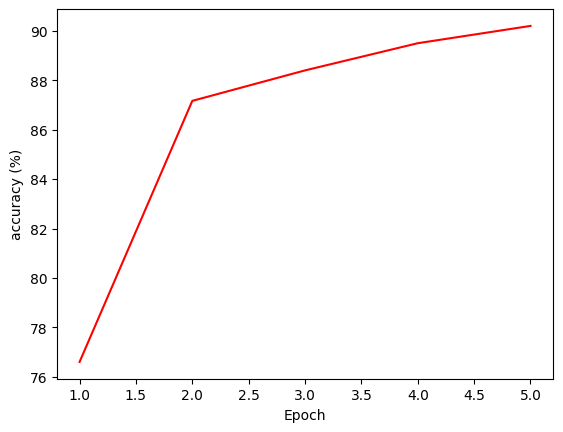

In [ ]:
nn13 = CNN_v5(2, 7, False)
nn13.train(train_X, y_train_one_hot, 5, 5, 0.01)

# **CNN case.14**
*CNN Activation function:* `ReLU`<p>
*CNN number of filter:* `2`<p>
***CNN size of filter:*** `9x9`<p>
*CNN number of layer:* `1`<p>
*CNN bias:* `no`<p>
***CNN Pooling:*** `no`<p>
*Batch size:* `5`<p>
*Learning Rate algorithm:* `fixed(0.01)`<p>
*Training time:* `3 min 40 sec`<p>
*Epoch `5` : training accuracy = `10.467 %` , testing accuracy =`10.6 %`*<p>
訓練到epoch 3時，準確率驟降，需要調低學習率才能穩定。(?)

Epoch 1, error = 0.0862489, training accuracy = 74.833 %, testing accuracy = 80.667 %
Epoch 2, error = 0.05142132, training accuracy = 84.3 %, testing accuracy = 77.767 %
Epoch 3, error = 0.30424407, training accuracy = 47.167 %, testing accuracy = 18.5 %
Epoch 4, error = 0.32387784, training accuracy = 15.133 %, testing accuracy = 10.6 %
Epoch 5, error = 0.32419486, training accuracy = 10.467 %, testing accuracy = 10.6 %


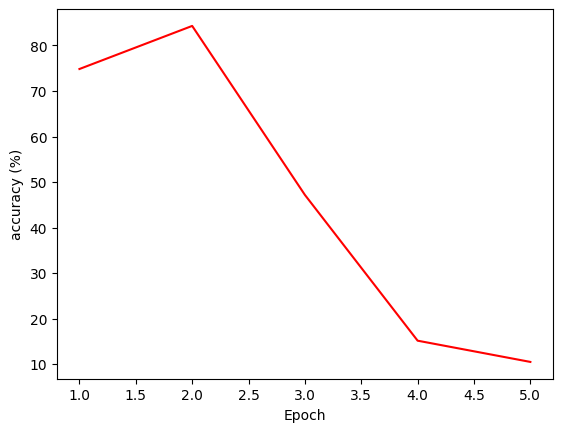

In [ ]:
nn14 = CNN_v5(2, 9, False)
nn14.train(train_X, y_train_one_hot, 5, 5, 0.01)

# **CNN case.15**
*CNN Activation function:* `ReLU`<p>
*CNN number of filter:* `2`<p>
***CNN size of filter:*** `11x11`<p>
*CNN number of layer:* `1`<p>
*CNN bias:* `no`<p>
***CNN Pooling:*** `no`<p>
*Batch size:* `5`<p>
*Learning Rate algorithm:* `fixed(0.01)`<p>
*Training time:* `3 min 21 sec`<p>
*Epoch `5` : training accuracy = `10.833 %` , testing accuracy =`10.6 %`*<p>
訓練中準確率會震盪常嚴重，嚴重影響結果，需要調低學習率才能穩定。(?)

Epoch 1, error = 0.32503831, training accuracy = 36.933 %, testing accuracy = 18.167 %
Epoch 2, error = 0.32043532, training accuracy = 18.967 %, testing accuracy = 17.567 %
Epoch 3, error = 0.35419271, training accuracy = 20.1 %, testing accuracy = 17.7 %
Epoch 4, error = 0.3342605, training accuracy = 12.467 %, testing accuracy = 10.6 %
Epoch 5, error = 0.32981538, training accuracy = 10.833 %, testing accuracy = 10.6 %


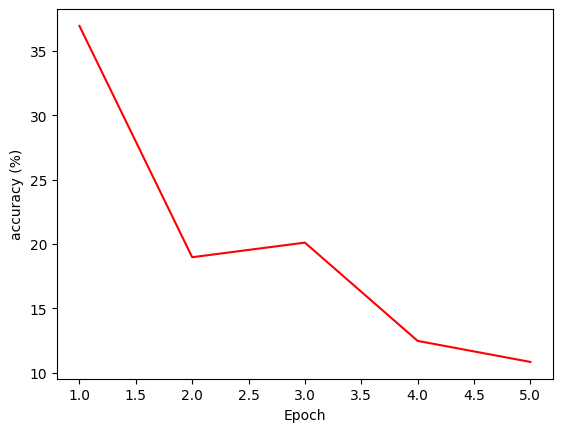

In [ ]:
nn15 = CNN_v5(2, 11, False)
nn15.train(train_X, y_train_one_hot, 5, 5, 0.01)

# **CNN case.16**
*CNN Activation function:* `ReLU`<p>
*CNN number of filter:* `2`<p>
*CNN size of filter:* `5x5`<p>
*CNN number of layer:* `1`<p>
***CNN bias:*** `Yes(1 output 1 bias)`<p>
*CNN Pooling:* `2x2`<p>
*Batch size:* `5`<p>
*Learning Rate algorithm:* `fixed(0.01)`<p>
*Training time:* `6 min 19 sec`<p>
*Epoch `5` : training accuracy = `94.167 %` , testing accuracy =`89.467 %`*<p>
與case.4相比，準確率提高1%左右。

In [5]:
class CNN_v6:
    def __init__(self, num_filter, filter_size=5, pooling=True):  # 以num_filter:2, filter_size=5為例
        self.num_filter = num_filter
        self.filter_size = filter_size
        self.pooling = pooling
        self.feature_map_size = 28 - filter_size + 1  # 24
        self.feature_map_pooled_size = self.feature_map_size // 2  # 12
        np.random.seed(1)
        self.filter = np.random.randn(num_filter, filter_size, filter_size) * 0.01  # (2, 5, 5)  # 用randn與random對結果幾乎沒有差別
        self.filter_bias = np.random.randn(num_filter, self.feature_map_size, self.feature_map_size) * 0.01  # (2, 24, 24) 也可以一個filter一個bias
        np.random.seed(2)
        if pooling:
            self.w1 = np.random.randn(10, num_filter*self.feature_map_pooled_size**2) * 0.01  # (10, 288)
        else:
            self.w1 = np.random.randn(10, num_filter*self.feature_map_size**2) * 0.01  # (10, 1152)
        np.random.seed(3)
        self.b1 = np.random.randn(1, 10)* 0.01  # (1, 10)

    def predict(self, input):
        feature_map = np.zeros((self.num_filter, self.feature_map_size, self.feature_map_size))  # (28, 28)-->feature_map:(2, 24, 24)
        matrix_1 = np.zeros((self.filter_size, self.filter_size))
        for f in range(self.num_filter):
            for i in range(len(feature_map[0])):
                for j in range(len(feature_map[0])):
                    matrix_1 = input[i:i+len(matrix_1), j:j+len(matrix_1)]
                    feature_map[f, i, j] = np.sum(self.filter[f] * matrix_1)

        feature_map = feature_map + self.filter_bias

        if self.pooling:
            # Max-pooling : (2, 24, 24)-->(2, 12, 12)
            frame = np.zeros((2, 2))
            feature_map_pooled = np.zeros((self.num_filter, self.feature_map_pooled_size, self.feature_map_pooled_size))  # (2, 12, 12)
            feature_map_max_position = np.zeros((self.num_filter, self.feature_map_size, self.feature_map_size))  # (2, 24, 24)

            for f in range(self.num_filter):
                for row in range(len(feature_map_pooled[0])) :
                    for column in range(len(feature_map_pooled[0])):
                        frame = feature_map[f, 2*row:2*row+len(frame), 2*column:2*column+len(frame)]
                        feature_map_pooled[f, row, column]= np.max(frame)

            feature_map_pooled_relu = relu(feature_map_pooled)  # (2, 12, 12)

            # flatten
            feature_map_pooled_flatten = feature_map_pooled_relu.reshape(1, self.num_filter*self.feature_map_pooled_size**2)  # (1, 288)
            output = softmax(np.dot(feature_map_pooled_flatten, self.w1.T) + self.b1)  # (1, 10)  # 加不加softmax幾乎沒差別

        else:
            # flatten
            feature_map_flatten = feature_map.reshape(1, self.num_filter*self.feature_map_size**2)  # (1, 1152)
            feature_map_flatten_relu = relu(feature_map_flatten)  # (1, 1152)
            output = softmax(np.dot(feature_map_flatten_relu, self.w1.T) + self.b1)  # (1, 10)  # 加不加softmax幾乎沒差別

        return output

    def train(self, input, ground_truth, epochs, batch_size, learning_rate):
        accuracy = []
        batch_num = len(input) // batch_size  # 3000 / 10 = 300

        for epoch in range(epochs):
            error = 0
            correct_count = 0

            for batch in range(batch_num):
                picture = input[batch_size*batch:batch_size*batch+batch_size]  # (batch_size, 28, 28)
                label = ground_truth[batch_size*batch:batch_size*batch+batch_size]  # (batch_size, 10)

                # forward
                feature_map = np.zeros((batch_size, self.num_filter, self.feature_map_size, self.feature_map_size))  # (batch_size, 28, 28)-->feature_map:(batch_size, 2, 24, 24)
                matrix_1 = np.zeros((self.filter_size, self.filter_size))
                for count in range(batch_size):
                    for f in range(self.num_filter):
                        for i in range(len(feature_map[0, 0])):
                            for j in range(len(feature_map[0, 0])):
                                matrix_1 = picture[count, i:i+len(matrix_1), j:j+len(matrix_1)]
                                feature_map[count, f, i, j] = np.sum(self.filter[f] * matrix_1)

                feature_map = feature_map + self.filter_bias

                if self.pooling:
                    # Max-pooling : (batch_size, 2, 24, 24)-->(batch_size, 2, 12, 12)
                    frame = np.zeros((2, 2))
                    feature_map_pooled = np.zeros((batch_size, self.num_filter, self.feature_map_pooled_size, self.feature_map_pooled_size))  # (batch_size, 2, 12, 12)
                    feature_map_max_position = np.zeros((batch_size, self.num_filter, self.feature_map_size, self.feature_map_size))  # (batch_size, 2, 24, 24)

                    for count in range(batch_size):
                        for f in range(self.num_filter):
                            for row in range(len(feature_map_pooled[0, 0])):
                                for column in range(len(feature_map_pooled[0, 0])):
                                    frame = feature_map[count, f, 2*row:2*row+len(frame), 2*column:2*column+len(frame)]
                                    feature_map_pooled[count, f, row, column]= np.max(frame)

                                    # record the index of max value
                                    max_index = np.argmax(frame)
                                    feature_map_max_position[count, f, 2*row+(max_index//2), 2*column+(max_index%2)] = 1

                    feature_map_pooled_relu = relu(feature_map_pooled)  # (batch_size, 2, 12, 12)

                    # flatten
                    feature_map_pooled_flatten = feature_map_pooled_relu.reshape(batch_size, self.num_filter*self.feature_map_pooled_size**2)  # (batch_size, 288)
                    output = softmax(np.dot(feature_map_pooled_flatten, self.w1.T) + self.b1)  # (batch_size, 10)  # 加不加softmax幾乎沒差別

                    # backward
                    dz1 = output - label  # (batch_size, 10)  乘上relu_derive準確度會提高一些
                    error = cross_entropy_loss(output, label)
                    dw1 = np.dot(feature_map_pooled_flatten.T, dz1).T  # (10, 288)
                    # dw1 = np.outer(dz1, feature_map_pooled_flatten)  # 與dot無差別
                    db1 = np.mean(dz1, axis=0, keepdims=True)  # keepdims:(10,)-->(1, 10)

                    da_pulum = np.dot(dz1, self.w1)  # (batch_size, 288)
                    da_pulum_unsample = da_pulum.reshape(batch_size, self.num_filter, self.feature_map_pooled_size, self.feature_map_pooled_size)  # (batch_size, 2, 12, 12) (可能會出錯)
                    da = da_pulum_unsample * relu_derive(feature_map_pooled)  # (batch_size, 2, 12, 12)

                    # expand da:(batch_size, 2, 12, 12)-->(batch_size, 2, 24, 24)
                    da_original = np.zeros((batch_size, self.num_filter, self.feature_map_size, self.feature_map_size))
                    for count in range(batch_size):
                        for f in range(self.num_filter):
                            for column in range(self.feature_map_pooled_size):
                                for row in range(self.feature_map_pooled_size):
                                    da_original[count, f, row*2, column*2] = da[count, f, row, column]
                                    da_original[count, f, row*2+1, column*2] = da[count, f, row, column]
                                    da_original[count, f, row*2, column*2+1] = da[count, f, row, column]
                                    da_original[count, f, row*2+1, column*2+1] = da[count, f, row, column]

                    da_original = da_original * feature_map_max_position  # (batch_size, 2, 24, 24)
                    dfilter_bias = np.sum(da_original, axis=0)  # (2, 24, 24)

                    # compute df (x和da_original進行卷積)
                    df = np.zeros((self.num_filter, self.filter_size, self.filter_size))  # (2, 5, 5)
                    matrix_2 = np.zeros((self.feature_map_size, self.feature_map_size))

                    for count in range(batch_size):
                        for f in range(self.num_filter):
                            for column in range(len(df[0])):
                                for row in range(len(df[0])):
                                    matrix_2 = picture[count, row:row+len(matrix_2), column:column+len(matrix_2)]
                                    df[f, row, column] = np.sum(matrix_2 * da_original[count, f])

                else:
                    # flatten  因為要紀錄feature_map_flatten，所以先拉平再relu
                    feature_map_flatten = feature_map.reshape(batch_size, self.num_filter*self.feature_map_size**2)  # (batch_size, 1152)
                    feature_map_flatten_relu = relu(feature_map_flatten)  # (batch_size, 1152)
                    output = softmax(np.dot(feature_map_flatten_relu, self.w1.T) + self.b1)  # (batch_size, 10)  # 加不加softmax幾乎沒差別

                    # backward
                    dz1 = output - label  # (batch_size, 10)  乘上relu_derive準確度會提高一些
                    error = cross_entropy_loss(output, label)
                    dw1 = np.dot(feature_map_flatten.T, dz1).T  # (10, 1152)
                    db1 = np.mean(dz1, axis=0, keepdims=True)  # keepdims:(10,)-->(1, 10)

                    da = np.dot(dz1, self.w1) * relu_derive(feature_map_flatten) # (batch_size, 1152)
                    da = da.reshape(batch_size, self.num_filter, self.feature_map_size, self.feature_map_size)  # (batch_size, 2, 24, 24)
                    dfilter_bias = np.sum(da, axis=0)  # (2, 24, 24)

                    # compute df (x和da進行卷積)
                    df = np.zeros((self.num_filter, self.filter_size, self.filter_size))  # (2, 5, 5)
                    matrix_2 = np.zeros((self.feature_map_size, self.feature_map_size))

                    for count in range(batch_size):
                        for f in range(self.num_filter):
                            for column in range(len(df[0])):
                                for row in range(len(df[0])):
                                    matrix_2 = picture[count, row:row+len(matrix_2), column:column+len(matrix_2)]
                                    df[f, row, column] = np.sum(matrix_2 * da[count, f])

                # update parameter
                self.w1 = self.w1 - learning_rate * dw1
                self.b1 = self.b1 - learning_rate * db1
                self.filter = self.filter - learning_rate * df
                self.filter_bias = self.filter_bias - learning_rate * dfilter_bias

                # calculate accuracy on training set
                for count in range(len(output)):
                    if(np.argmax(output[count]) == np.argmax(label[count])):
                        correct_count += 1

            acc = correct_count / len(input) * 100
            accuracy.append(acc)

            # calculate accuracy on test set
            num_correct = 0
            for k in range(len(test_X)):
                prediction = self.predict(test_X[k])
                if np.argmax(prediction) == np.argmax(y_test_one_hot[k]):
                    num_correct += 1

            acc_test = num_correct / len(test_X) * 100

            print("Epoch {}, error = {}, training accuracy = {} %, testing accuracy = {} %".format(epoch+1, round(error, 8), round(acc, 3), round(acc_test, 3)))

        # show the accuracy graph
        plt.plot(range(1, epochs+1), accuracy, color='red')
        plt.xlabel("Epoch")
        plt.ylabel("accuracy (%)")
        plt.show()

Epoch 1, error = 0.08246971, training accuracy = 67.133 %, testing accuracy = 83.667 %
Epoch 2, error = 0.0499677, training accuracy = 88.867 %, testing accuracy = 86.033 %
Epoch 3, error = 0.03329067, training accuracy = 91.333 %, testing accuracy = 87.6 %
Epoch 4, error = 0.0246867, training accuracy = 93.067 %, testing accuracy = 88.667 %
Epoch 5, error = 0.01855619, training accuracy = 94.167 %, testing accuracy = 89.467 %


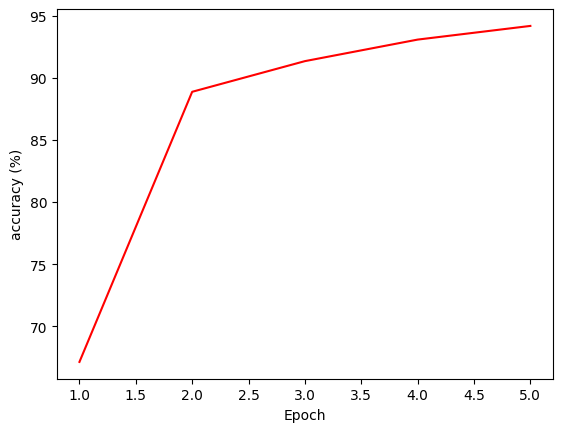

In [ ]:
nn16 = CNN_v6(2, 5)
nn16.train(train_X, y_train_one_hot, 5, 5, 0.01)

Epoch 1, error = 0.00396747, training accuracy = 78.4 %, testing accuracy = 86.333 %
Epoch 2, error = 0.0014631, training accuracy = 91.533 %, testing accuracy = 89.8 %
Epoch 3, error = 0.00117883, training accuracy = 94.333 %, testing accuracy = 91.4 %
Epoch 4, error = 0.0016335, training accuracy = 95.9 %, testing accuracy = 91.6 %
Epoch 5, error = 0.00296188, training accuracy = 97.033 %, testing accuracy = 91.467 %


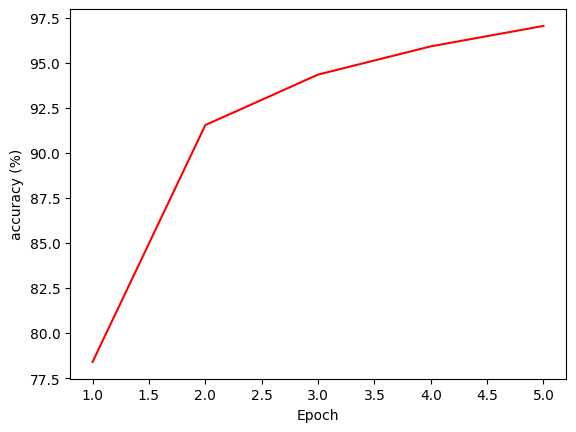

In [6]:
nn16_test = CNN_v6(5, 5)
nn16_test.train(train_X, y_train_one_hot, 5, 1, 0.01)

# **CNN case.17**
*CNN Activation function:* `ReLU`<p>
*CNN number of filter:* `2`<p>
*CNN size of filter:* `5x5`<p>
*CNN number of layer:* `1`<p>
***CNN bias:*** `Yes(1 filter 1 bias)`<p>
*CNN Pooling:* `2x2`<p>
*Batch size:* `5`<p>
*Learning Rate algorithm:* `fixed(0.01)`<p>
*Training time:* `6 min 22 sec`<p>
*Epoch `5` : training accuracy = `93.4 %` , testing accuracy =`88.1 %`*<p>
與case.4相比，準確率略低，不如不加。

In [ ]:
class CNN_v7:
    def __init__(self, num_filter, filter_size=5, pooling=True):  # 以num_filter:2, filter_size=5為例
        self.num_filter = num_filter
        self.filter_size = filter_size
        self.pooling = pooling
        self.feature_map_size = 28 - filter_size + 1  # 24
        self.feature_map_pooled_size = self.feature_map_size // 2  # 12
        np.random.seed(1)
        self.filter = np.random.randn(num_filter, filter_size, filter_size) * 0.01  # (2, 5, 5)  # 用randn與random對結果幾乎沒有差別
        self.filter_bias = np.random.randn(num_filter, 1, 1) * 0.01  # (2, 1, 1) 一個filter一個bias
        np.random.seed(2)
        if pooling:
            self.w1 = np.random.randn(10, num_filter*self.feature_map_pooled_size**2) * 0.01  # (10, 288)
        else:
            self.w1 = np.random.randn(10, num_filter*self.feature_map_size**2) * 0.01  # (10, 1152)
        np.random.seed(3)
        self.b1 = np.random.randn(1, 10)* 0.01  # (1, 10)

    def predict(self, input):
        feature_map = np.zeros((self.num_filter, self.feature_map_size, self.feature_map_size))  # (28, 28)-->feature_map:(2, 24, 24)
        matrix_1 = np.zeros((self.filter_size, self.filter_size))
        for f in range(self.num_filter):
            for i in range(len(feature_map[0])):
                for j in range(len(feature_map[0])):
                    matrix_1 = input[i:i+len(matrix_1), j:j+len(matrix_1)]
                    feature_map[f, i, j] = np.sum(self.filter[f] * matrix_1)

        if self.pooling:
            # Max-pooling : (2, 24, 24)-->(2, 12, 12)
            frame = np.zeros((2, 2))
            feature_map_pooled = np.zeros((self.num_filter, self.feature_map_pooled_size, self.feature_map_pooled_size))  # (2, 12, 12)
            feature_map_max_position = np.zeros((self.num_filter, self.feature_map_size, self.feature_map_size))  # (2, 24, 24)

            for f in range(self.num_filter):
                for row in range(len(feature_map_pooled[0])) :
                    for column in range(len(feature_map_pooled[0])):
                        frame = feature_map[f, 2*row:2*row+len(frame), 2*column:2*column+len(frame)]
                        feature_map_pooled[f, row, column]= np.max(frame)

            feature_map_pooled_relu = relu(feature_map_pooled)  # (2, 12, 12)

            # flatten
            feature_map_pooled_flatten = feature_map_pooled_relu.reshape(1, self.num_filter*self.feature_map_pooled_size**2)  # (1, 288)
            output = softmax(np.dot(feature_map_pooled_flatten, self.w1.T) + self.b1)  # (1, 10)  # 加不加softmax幾乎沒差別

        else:
            # flatten
            feature_map_flatten = feature_map.reshape(1, self.num_filter*self.feature_map_size**2)  # (1, 1152)
            feature_map_flatten_relu = relu(feature_map_flatten)  # (1, 1152)
            output = softmax(np.dot(feature_map_flatten_relu, self.w1.T) + self.b1)  # (1, 10)  # 加不加softmax幾乎沒差別

        return output

    def train(self, input, ground_truth, epochs, batch_size, learning_rate):
        accuracy = []
        batch_num = len(input) // batch_size  # 3000 / 10 = 300

        for epoch in range(epochs):
            error = 0
            correct_count = 0

            for batch in range(batch_num):
                picture = input[batch_size*batch:batch_size*batch+batch_size]  # (batch_size, 28, 28)
                label = ground_truth[batch_size*batch:batch_size*batch+batch_size]  # (batch_size, 10)

                # forward
                feature_map = np.zeros((batch_size, self.num_filter, self.feature_map_size, self.feature_map_size))  # (batch_size, 28, 28)-->feature_map:(batch_size, 2, 24, 24)
                matrix_1 = np.zeros((self.filter_size, self.filter_size))
                for count in range(batch_size):
                    for f in range(self.num_filter):
                        for i in range(len(feature_map[0, 0])):
                            for j in range(len(feature_map[0, 0])):
                                matrix_1 = picture[count, i:i+len(matrix_1), j:j+len(matrix_1)]
                                feature_map[count, f, i, j] = np.sum(self.filter[f] * matrix_1)

                feature_map = feature_map + self.filter_bias

                if self.pooling:
                    # Max-pooling : (batch_size, 2, 24, 24)-->(batch_size, 2, 12, 12)
                    frame = np.zeros((2, 2))
                    feature_map_pooled = np.zeros((batch_size, self.num_filter, self.feature_map_pooled_size, self.feature_map_pooled_size))  # (batch_size, 2, 12, 12)
                    feature_map_max_position = np.zeros((batch_size, self.num_filter, self.feature_map_size, self.feature_map_size))  # (batch_size, 2, 24, 24)

                    for count in range(batch_size):
                        for f in range(self.num_filter):
                            for row in range(len(feature_map_pooled[0, 0])):
                                for column in range(len(feature_map_pooled[0, 0])):
                                    frame = feature_map[count, f, 2*row:2*row+len(frame), 2*column:2*column+len(frame)]
                                    feature_map_pooled[count, f, row, column]= np.max(frame)

                                    # record the index of max value
                                    max_index = np.argmax(frame)
                                    feature_map_max_position[count, f, 2*row+(max_index//2), 2*column+(max_index%2)] = 1

                    feature_map_pooled_relu = relu(feature_map_pooled)  # (batch_size, 2, 12, 12)

                    # flatten
                    feature_map_pooled_flatten = feature_map_pooled_relu.reshape(batch_size, self.num_filter*self.feature_map_pooled_size**2)  # (batch_size, 288)
                    output = softmax(np.dot(feature_map_pooled_flatten, self.w1.T) + self.b1)  # (batch_size, 10)  # 加不加softmax幾乎沒差別

                    # backward
                    dz1 = output - label  # (batch_size, 10)  乘上relu_derive準確度會提高一些
                    error = cross_entropy_loss(output, label)
                    dw1 = np.dot(feature_map_pooled_flatten.T, dz1).T  # (10, 288)
                    # dw1 = np.outer(dz1, feature_map_pooled_flatten)  # 與dot無差別
                    db1 = np.mean(dz1, axis=0, keepdims=True)  # keepdims:(10,)-->(1, 10)

                    da_pulum = np.dot(dz1, self.w1)  # (batch_size, 288)
                    da_pulum_unsample = da_pulum.reshape(batch_size, self.num_filter, self.feature_map_pooled_size, self.feature_map_pooled_size)  # (batch_size, 2, 12, 12) (可能會出錯)
                    da = da_pulum_unsample * relu_derive(feature_map_pooled)  # (batch_size, 2, 12, 12)

                    # expand da:(batch_size, 2, 12, 12)-->(batch_size, 2, 24, 24)
                    da_original = np.zeros((batch_size, self.num_filter, self.feature_map_size, self.feature_map_size))
                    for count in range(batch_size):
                        for f in range(self.num_filter):
                            for column in range(self.feature_map_pooled_size):
                                for row in range(self.feature_map_pooled_size):
                                    da_original[count, f, row*2, column*2] = da[count, f, row, column]
                                    da_original[count, f, row*2+1, column*2] = da[count, f, row, column]
                                    da_original[count, f, row*2, column*2+1] = da[count, f, row, column]
                                    da_original[count, f, row*2+1, column*2+1] = da[count, f, row, column]

                    da_original = da_original * feature_map_max_position  # (batch_size, 2, 24, 24)
                    dfilter_bias = np.mean(np.sum(da_original, axis=0), axis=(1, 2), keepdims=True)  # (2, 24, 24)-->(2, 1, 1)

                    # compute df (x和da_original進行卷積)
                    df = np.zeros((self.num_filter, self.filter_size, self.filter_size))  # (2, 5, 5)
                    matrix_2 = np.zeros((self.feature_map_size, self.feature_map_size))

                    for count in range(batch_size):
                        for f in range(self.num_filter):
                            for column in range(len(df[0])):
                                for row in range(len(df[0])):
                                    matrix_2 = picture[count, row:row+len(matrix_2), column:column+len(matrix_2)]
                                    df[f, row, column] = np.sum(matrix_2 * da_original[count, f])

                else:
                    # flatten  因為要紀錄feature_map_flatten，所以先拉平再relu
                    feature_map_flatten = feature_map.reshape(batch_size, self.num_filter*self.feature_map_size**2)  # (batch_size, 1152)
                    feature_map_flatten_relu = relu(feature_map_flatten)  # (batch_size, 1152)
                    output = softmax(np.dot(feature_map_flatten_relu, self.w1.T) + self.b1)  # (batch_size, 10)  # 加不加softmax幾乎沒差別

                    # backward
                    dz1 = output - label  # (batch_size, 10)  乘上relu_derive準確度會提高一些
                    error = cross_entropy_loss(output, label)
                    dw1 = np.dot(feature_map_flatten.T, dz1).T  # (10, 1152)
                    db1 = np.mean(dz1, axis=0, keepdims=True)  # keepdims:(10,)-->(1, 10)

                    da = np.dot(dz1, self.w1) * relu_derive(feature_map_flatten) # (batch_size, 1152)
                    da = da.reshape(batch_size, self.num_filter, self.feature_map_size, self.feature_map_size)  # (batch_size, 2, 24, 24)
                    dfilter_bias = np.mean(np.sum(da, axis=0), axis=(1, 2), keepdims=True)  # (2, 24, 24)-->(2, 1, 1)

                    # compute df (x和da進行卷積)
                    df = np.zeros((self.num_filter, self.filter_size, self.filter_size))  # (2, 5, 5)
                    matrix_2 = np.zeros((self.feature_map_size, self.feature_map_size))

                    for count in range(batch_size):
                        for f in range(self.num_filter):
                            for column in range(len(df[0])):
                                for row in range(len(df[0])):
                                    matrix_2 = picture[count, row:row+len(matrix_2), column:column+len(matrix_2)]
                                    df[f, row, column] = np.sum(matrix_2 * da[count, f])

                # update parameter
                self.w1 = self.w1 - learning_rate * dw1
                self.b1 = self.b1 - learning_rate * db1
                self.filter = self.filter - learning_rate * df
                self.filter_bias = self.filter_bias - learning_rate * dfilter_bias

                # calculate accuracy on training set
                for count in range(len(output)):
                    if(np.argmax(output[count]) == np.argmax(label[count])):
                        correct_count += 1

            acc = correct_count / len(input) * 100
            accuracy.append(acc)

            # calculate accuracy on test set
            num_correct = 0
            for k in range(len(test_X)):
                prediction = self.predict(test_X[k])
                if np.argmax(prediction) == np.argmax(y_test_one_hot[k]):
                    num_correct += 1

            acc_test = num_correct / len(test_X) * 100

            print("Epoch {}, error = {}, training accuracy = {} %, testing accuracy = {} %".format(epoch+1, round(error, 8), round(acc, 3), round(acc_test, 3)))

        # show the accuracy graph
        plt.plot(range(1, epochs+1), accuracy, color='red')
        plt.xlabel("Epoch")
        plt.ylabel("accuracy (%)")
        plt.show()

Epoch 1, error = 0.08686978, training accuracy = 68.033 %, testing accuracy = 83.233 %
Epoch 2, error = 0.05525017, training accuracy = 88.4 %, testing accuracy = 85.6 %
Epoch 3, error = 0.03810327, training accuracy = 90.933 %, testing accuracy = 86.767 %
Epoch 4, error = 0.03092774, training accuracy = 92.033 %, testing accuracy = 87.367 %
Epoch 5, error = 0.02489665, training accuracy = 93.4 %, testing accuracy = 88.1 %


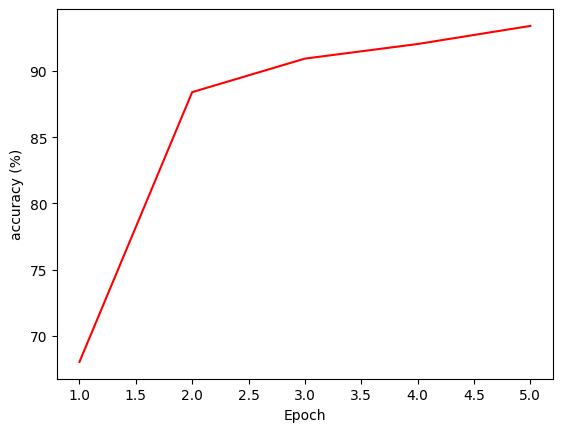

In [ ]:
nn17 = CNN_v7(2, 5)
nn17.train(train_X, y_train_one_hot, 5, 5, 0.01)

# **Conclusion**
1.當filter size越大，feature map越小，裡面的值會越大，越有可能會導致梯度爆炸，可用pooling或降低learning rate的方式解決。<p>
2.filter size越大，觀看範圍較大，可能會對未知的資料有較高的準確率。<p>
3.batch size越小準確率越高。<p>
4.加入bias可提高準確率。


# **CNN case.16_debug**
*CNN Activation function:* `ReLU`<p>
*CNN number of filter:* `2`<p>
*CNN size of filter:* `5x5`<p>
*CNN number of layer:* `1`<p>
*CNN bias:* `Yes(1 output 1 bias)`<p>
*CNN Pooling:* `2x2`<p>
*Batch size:* `5`<p>
*Learning Rate algorithm:* `fixed(0.01)`<p>
**Use Gradient Check to test model correctness**

In [38]:
class CNN_v6:
    def __init__(self, num_filter, filter_size=5, pooling=True):  # 以num_filter:2, filter_size=5為例
        self.num_filter = num_filter
        self.filter_size = filter_size
        self.pooling = pooling
        self.feature_map_size = 28 - filter_size + 1  # 24
        self.feature_map_pooled_size = self.feature_map_size // 2  # 12
        np.random.seed(1)
        self.filter = np.random.randn(num_filter, filter_size, filter_size) * 0.01  # (2, 5, 5)  # 用randn與random對結果幾乎沒有差別
        self.filter_bias = np.random.randn(num_filter, self.feature_map_size, self.feature_map_size) * 0.01  # (2, 24, 24) 也可以一個filter一個bias
        np.random.seed(2)
        if pooling:
            self.w1 = np.random.randn(10, num_filter*self.feature_map_pooled_size**2) * 0.01  # (10, 288)
        else:
            self.w1 = np.random.randn(10, num_filter*self.feature_map_size**2) * 0.01  # (10, 1152)
        np.random.seed(3)
        self.b1 = np.random.randn(1, 10)* 0.01  # (1, 10)

    def predict(self, input):
        feature_map = np.zeros((self.num_filter, self.feature_map_size, self.feature_map_size))  # (28, 28)-->feature_map:(2, 24, 24)
        matrix_1 = np.zeros((self.filter_size, self.filter_size))
        for f in range(self.num_filter):
            for i in range(len(feature_map[0])):
                for j in range(len(feature_map[0])):
                    matrix_1 = input[i:i+len(matrix_1), j:j+len(matrix_1)]
                    feature_map[f, i, j] = np.sum(self.filter[f] * matrix_1)

        feature_map = feature_map + self.filter_bias

        if self.pooling:
            # Max-pooling : (2, 24, 24)-->(2, 12, 12)
            frame = np.zeros((2, 2))
            feature_map_pooled = np.zeros((self.num_filter, self.feature_map_pooled_size, self.feature_map_pooled_size))  # (2, 12, 12)
            feature_map_max_position = np.zeros((self.num_filter, self.feature_map_size, self.feature_map_size))  # (2, 24, 24)

            for f in range(self.num_filter):
                for row in range(len(feature_map_pooled[0])) :
                    for column in range(len(feature_map_pooled[0])):
                        frame = feature_map[f, 2*row:2*row+len(frame), 2*column:2*column+len(frame)]
                        feature_map_pooled[f, row, column]= np.max(frame)

            feature_map_pooled_relu = relu(feature_map_pooled)  # (2, 12, 12)

            # flatten
            feature_map_pooled_flatten = feature_map_pooled_relu.reshape(1, self.num_filter*self.feature_map_pooled_size**2)  # (1, 288)
            output = softmax(np.dot(feature_map_pooled_flatten, self.w1.T) + self.b1)  # (1, 10)  # 加不加softmax幾乎沒差別

        else:
            # flatten
            feature_map_flatten = feature_map.reshape(1, self.num_filter*self.feature_map_size**2)  # (1, 1152)
            feature_map_flatten_relu = relu(feature_map_flatten)  # (1, 1152)
            output = softmax(np.dot(feature_map_flatten_relu, self.w1.T) + self.b1)  # (1, 10)  # 加不加softmax幾乎沒差別

        return output

    def train(self, input, ground_truth, epochs, batch_size, learning_rate):
        accuracy = []
        batch_num = len(input) // batch_size  # 3000 / 10 = 300

        for epoch in range(epochs):
            error = 0
            correct_count = 0

            for batch in range(batch_num):
                picture = input[batch_size*batch:batch_size*batch+batch_size]  # (batch_size, 28, 28)
                label = ground_truth[batch_size*batch:batch_size*batch+batch_size]  # (batch_size, 10)

                # forward
                feature_map = np.zeros((batch_size, self.num_filter, self.feature_map_size, self.feature_map_size))  # (batch_size, 28, 28)-->feature_map:(batch_size, 2, 24, 24)
                matrix_1 = np.zeros((self.filter_size, self.filter_size))
                for count in range(batch_size):
                    for f in range(self.num_filter):
                        for i in range(len(feature_map[0, 0])):
                            for j in range(len(feature_map[0, 0])):
                                matrix_1 = picture[count, i:i+len(matrix_1), j:j+len(matrix_1)]
                                feature_map[count, f, i, j] = np.sum(self.filter[f] * matrix_1)

                feature_map = feature_map + self.filter_bias

                if self.pooling:
                    # Max-pooling : (batch_size, 2, 24, 24)-->(batch_size, 2, 12, 12)
                    frame = np.zeros((2, 2))
                    feature_map_pooled = np.zeros((batch_size, self.num_filter, self.feature_map_pooled_size, self.feature_map_pooled_size))  # (batch_size, 2, 12, 12)
                    feature_map_max_position = np.zeros((batch_size, self.num_filter, self.feature_map_size, self.feature_map_size))  # (batch_size, 2, 24, 24)

                    for count in range(batch_size):
                        for f in range(self.num_filter):
                            for row in range(len(feature_map_pooled[0, 0])):
                                for column in range(len(feature_map_pooled[0, 0])):
                                    frame = feature_map[count, f, 2*row:2*row+len(frame), 2*column:2*column+len(frame)]
                                    feature_map_pooled[count, f, row, column]= np.max(frame)

                                    # record the index of max value
                                    max_index = np.argmax(frame)
                                    feature_map_max_position[count, f, 2*row+(max_index//2), 2*column+(max_index%2)] = 1

                    feature_map_pooled_relu = relu(feature_map_pooled)  # (batch_size, 2, 12, 12)

                    # flatten
                    feature_map_pooled_flatten = feature_map_pooled_relu.reshape(batch_size, self.num_filter*self.feature_map_pooled_size**2)  # (batch_size, 288)
                    output = softmax(np.dot(feature_map_pooled_flatten, self.w1.T) + self.b1)  # (batch_size, 10)  # 加不加softmax幾乎沒差別

                    # backward
                    dz1 = output - label  # (batch_size, 10)  乘上relu_derive準確度會提高一些
                    error = cross_entropy_loss(output, label)
                    dw1 = np.dot(feature_map_pooled_flatten.T, dz1).T  # (10, 288)
                    # dw1 = np.outer(dz1, feature_map_pooled_flatten)  # 與dot無差別
                    db1 = np.mean(dz1, axis=0, keepdims=True)  # keepdims:(10,)-->(1, 10)

                    da_pulum = np.dot(dz1, self.w1)  # (batch_size, 288)
                    da_pulum_unsample = da_pulum.reshape(batch_size, self.num_filter, self.feature_map_pooled_size, self.feature_map_pooled_size)  # (batch_size, 2, 12, 12) (可能會出錯)
                    da = da_pulum_unsample * relu_derive(feature_map_pooled)  # (batch_size, 2, 12, 12)

                    # expand da:(batch_size, 2, 12, 12)-->(batch_size, 2, 24, 24)
                    da_original = np.zeros((batch_size, self.num_filter, self.feature_map_size, self.feature_map_size))
                    for count in range(batch_size):
                        for f in range(self.num_filter):
                            for column in range(self.feature_map_pooled_size):
                                for row in range(self.feature_map_pooled_size):
                                    da_original[count, f, row*2, column*2] = da[count, f, row, column]
                                    da_original[count, f, row*2+1, column*2] = da[count, f, row, column]
                                    da_original[count, f, row*2, column*2+1] = da[count, f, row, column]
                                    da_original[count, f, row*2+1, column*2+1] = da[count, f, row, column]

                    da_original = da_original * feature_map_max_position  # (batch_size, 2, 24, 24)
                    dfilter_bias = np.sum(da_original, axis=0)  # (2, 24, 24)

                    # compute df (x和da_original進行卷積)
                    df = np.zeros((self.num_filter, self.filter_size, self.filter_size))  # (2, 5, 5)
                    matrix_2 = np.zeros((self.feature_map_size, self.feature_map_size))

                    for count in range(batch_size):
                        for f in range(self.num_filter):
                            for column in range(len(df[0])):
                                for row in range(len(df[0])):
                                    matrix_2 = picture[count, row:row+len(matrix_2), column:column+len(matrix_2)]
                                    df[f, row, column] = np.sum(matrix_2 * da_original[count, f])

                else:
                    # flatten  因為要紀錄feature_map_flatten，所以先拉平再relu
                    feature_map_flatten = feature_map.reshape(batch_size, self.num_filter*self.feature_map_size**2)  # (batch_size, 1152)
                    feature_map_flatten_relu = relu(feature_map_flatten)  # (batch_size, 1152)
                    output = softmax(np.dot(feature_map_flatten_relu, self.w1.T) + self.b1)  # (batch_size, 10)  # 加不加softmax幾乎沒差別

                    # backward
                    dz1 = output - label  # (batch_size, 10)  乘上relu_derive準確度會提高一些
                    error = cross_entropy_loss(output, label)
                    dw1 = np.dot(feature_map_flatten.T, dz1).T  # (10, 1152)
                    db1 = np.mean(dz1, axis=0, keepdims=True)  # keepdims:(10,)-->(1, 10)

                    da = np.dot(dz1, self.w1) * relu_derive(feature_map_flatten) # (batch_size, 1152)
                    da = da.reshape(batch_size, self.num_filter, self.feature_map_size, self.feature_map_size)  # (batch_size, 2, 24, 24)
                    dfilter_bias = np.sum(da, axis=0)  # (2, 24, 24)

                    # compute df (x和da進行卷積)
                    df = np.zeros((self.num_filter, self.filter_size, self.filter_size))  # (2, 5, 5)
                    matrix_2 = np.zeros((self.feature_map_size, self.feature_map_size))

                    for count in range(batch_size):
                        for f in range(self.num_filter):
                            for column in range(len(df[0])):
                                for row in range(len(df[0])):
                                    matrix_2 = picture[count, row:row+len(matrix_2), column:column+len(matrix_2)]
                                    df[f, row, column] = np.sum(matrix_2 * da[count, f])

                # update parameter
                self.w1 = self.w1 - learning_rate * dw1
                self.b1 = self.b1 - learning_rate * db1
                self.filter = self.filter - learning_rate * df
                self.filter_bias = self.filter_bias - learning_rate * dfilter_bias

                # calculate accuracy on training set
                for count in range(len(output)):
                    if(np.argmax(output[count]) == np.argmax(label[count])):
                        correct_count += 1

            acc = correct_count / len(input) * 100
            accuracy.append(acc)

            # calculate accuracy on test set
            num_correct = 0
            for k in range(len(test_X)):
                prediction = self.predict(test_X[k])
                if np.argmax(prediction) == np.argmax(y_test_one_hot[k]):
                    num_correct += 1

            acc_test = num_correct / len(test_X) * 100

            print("Epoch {}, error = {}, training accuracy = {} %, testing accuracy = {} %".format(epoch+1, round(error, 8), round(acc, 3), round(acc_test, 3)))

        # show the accuracy graph
        plt.plot(range(1, epochs+1), accuracy, color='red')
        plt.xlabel("Epoch")
        plt.ylabel("accuracy (%)")
        plt.show()

    def debug(self, picture, label):  # use gradient check (https://youtu.be/QrzApibhohY?si=MPBBDfBY5z3ONJqO)
        epsilon = 1e-4
        initial_parameter = np.copy(self.filter)  # !!注意!!：不可直接用 initial_parameter = self.filter (即initial_parameter指向self.filter，會進行同步而不會創立新陣列)
        self.filter[1, 4, 4] = initial_parameter[1, 4, 4] + epsilon
        output = self.predict(picture)
        loss1 = -np.sum((label) * np.log(output))

        self.filter[1, 4, 4] = initial_parameter[1, 4, 4] - epsilon
        output = self.predict(picture)
        loss2 = -np.sum((label) * np.log(output))
        num_gradient = (loss1 - loss2) / (2 * epsilon)

        self.filter = np.copy(initial_parameter)

        # forward
        feature_map = np.zeros((self.num_filter, self.feature_map_size, self.feature_map_size))  # (batch_size, 28, 28)-->feature_map:(batch_size, 2, 24, 24)
        matrix_1 = np.zeros((self.filter_size, self.filter_size))

        for f in range(self.num_filter):
            for i in range(len(feature_map[0, 0])):
                for j in range(len(feature_map[0, 0])):
                    matrix_1 = picture[i:i+len(matrix_1), j:j+len(matrix_1)]
                    feature_map[f, i, j] = np.sum(self.filter[f] * matrix_1)

        feature_map = feature_map + self.filter_bias

        # Max-pooling : (batch_size, 2, 24, 24)-->(batch_size, 2, 12, 12)
        frame = np.zeros((2, 2))
        feature_map_pooled = np.zeros((self.num_filter, self.feature_map_pooled_size, self.feature_map_pooled_size))  # (2, 12, 12)
        feature_map_max_position = np.zeros((self.num_filter, self.feature_map_size, self.feature_map_size))  # (2, 24, 24)

        for f in range(self.num_filter):
            for row in range(len(feature_map_pooled[0, 0])):
                for column in range(len(feature_map_pooled[0, 0])):
                    frame = feature_map[f, 2*row:2*row+len(frame), 2*column:2*column+len(frame)]
                    feature_map_pooled[f, row, column]= np.max(frame)

                    # record the index of max value
                    max_index = np.argmax(frame)
                    feature_map_max_position[f, 2*row+(max_index//2), 2*column+(max_index%2)] = 1

        feature_map_pooled_relu = relu(feature_map_pooled)  # (batch_size, 2, 12, 12)

        # flatten
        feature_map_pooled_flatten = feature_map_pooled_relu.reshape(1, self.num_filter*self.feature_map_pooled_size**2)  # (1, 288)
        output = softmax(np.dot(feature_map_pooled_flatten, self.w1.T) + self.b1)  # (batch_size, 10)

        # backward
        dz1 = output - label  # (batch_size, 10)
        dw1 = np.dot(feature_map_pooled_flatten.T, dz1).T  # (10, 288)
        db1 = np.mean(dz1, axis=0, keepdims=True)  # keepdims:(10,)-->(1, 10)

        da_pulum = np.dot(dz1, self.w1)  # (batch_size, 288)
        da_pulum_unsample = da_pulum.reshape(self.num_filter, self.feature_map_pooled_size, self.feature_map_pooled_size)  # (batch_size, 2, 12, 12) (可能會出錯)
        da = da_pulum_unsample * relu_derive(feature_map_pooled)  # (batch_size, 2, 12, 12)

        # expand da:(batch_size, 2, 12, 12)-->(batch_size, 2, 24, 24)
        da_original = np.zeros((self.num_filter, self.feature_map_size, self.feature_map_size))
        for f in range(self.num_filter):
            for column in range(self.feature_map_pooled_size):
                for row in range(self.feature_map_pooled_size):
                    da_original[f, row*2, column*2] = da[f, row, column]
                    da_original[f, row*2+1, column*2] = da[f, row, column]
                    da_original[f, row*2, column*2+1] = da[f, row, column]
                    da_original[f, row*2+1, column*2+1] = da[f, row, column]

        da_original = da_original * feature_map_max_position  # (batch_size, 2, 24, 24)
        dfilter_bias = np.sum(da_original, axis=0)  # (2, 24, 24)

        # compute df (x和da_original進行卷積)
        df = np.zeros((self.num_filter, self.filter_size, self.filter_size))  # (2, 5, 5)
        matrix_2 = np.zeros((self.feature_map_size, self.feature_map_size))

        for f in range(self.num_filter):
            for column in range(len(df[0])):
                for row in range(len(df[0])):
                    matrix_2 = picture[row:row+len(matrix_2), column:column+len(matrix_2)]
                    df[f, row, column] = np.sum(matrix_2 * da_original[f])


        print(df[1, 4, 4])
        print()
        print(num_gradient)
        print()
        print(df[1, 4, 4] / num_gradient)

In [39]:
nn16 = CNN_v6(2, 5)
nn16.debug(train_X[1], y_train_one_hot[1])

0.05302237751713731

0.053022377517475405

0.9999999999936235


In [35]:
a = np.array([0, 0, 0, 0])
c = a  # c 為指向 a 的參考
a[1] = c[1] + 1
print(a[1])
print(c[1])

1
1
